In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

import torch
import torch.nn as nn
import torch.optim as optim

import pandas as pd

# Path to your .xlsx file
file_path = 'Forecasting last.xlsx'

# Read the Excel file
df = pd.read_excel(file_path)

# Display the dataframe
print(df)

   Bachelor of Science in Accounting Unnamed: 1          Unnamed: 2  \
0                               Year   Students  Forecast(Students)   
1                               2014        140                 NaN   
2                               2015        111                 NaN   
3                               2016        105                 NaN   
4                               2017         92                 NaN   
5                               2018         93                 NaN   
6                               2019        121                 NaN   
7                               2020        119                 NaN   
8                               2021        146                 NaN   
9                               2022        178                 NaN   
10                              2023        157                 157   
11                              2024        NaN          165.019645   
12                              2025        NaN           170.65762   
13    

Linear Regression Model
Mean Squared Error: 899.9936459571852
R^2 Score: 0.19804531436205375

Random Forest Regressor
Mean Squared Error: 656.0936999999996
R^2 Score: 0.4153765203831592


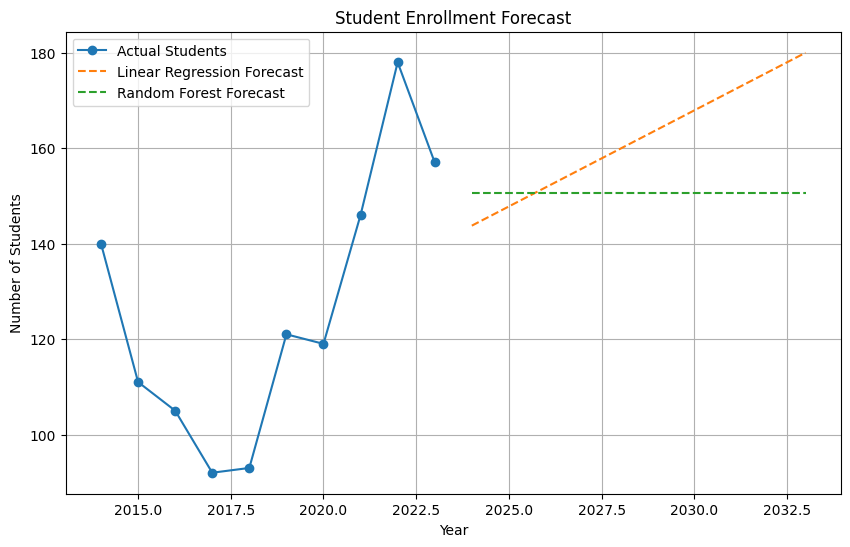

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Path to your .xlsx file
file_path = 'Forecasting last.xlsx'

# Read the Excel file
df = pd.read_excel(file_path)

# Rename columns to more meaningful names
df.columns = ['Year', 'Students', 'Forecast_Students', 'Lower_Confidence_Bound', 'Upper_Confidence_Bound']

# Drop the first row as it contains the old column names
df = df.drop(0)

# Reset the index
df = df.reset_index(drop=True)

# Convert the 'Year' column to numeric, handling the non-numeric first row
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna(subset=['Year'])

# Convert relevant columns to numeric
df['Students'] = pd.to_numeric(df['Students'], errors='coerce')

# Use data from 2014 to 2023 for training
train_data = df[(df['Year'] >= 2014) & (df['Year'] <= 2023)].dropna(subset=['Students'])

# Prepare the feature and target variable
X = train_data[['Year']]
y = train_data['Students']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the models
print('Linear Regression Model')
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_lr))
print('R^2 Score:', r2_score(y_test, y_pred_lr))

print('\nRandom Forest Regressor')
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_rf))
print('R^2 Score:', r2_score(y_test, y_pred_rf))

# Forecast future values (2024-2033)
future_years = pd.DataFrame({'Year': range(2024, 2034)})

# Make predictions for the future years
forecast_lr = lr_model.predict(future_years)
forecast_rf = rf_model.predict(future_years)

# Plot the actual and forecasted data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Students'], label='Actual Students', marker='o')
plt.plot(future_years, forecast_lr, label='Linear Regression Forecast', linestyle='--')
plt.plot(future_years, forecast_rf, label='Random Forest Forecast', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.title('Student Enrollment Forecast')
plt.legend()
plt.grid(True)
plt.show()


22:25:51 - cmdstanpy - INFO - Chain [1] start processing
22:25:51 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\iNetLab\fullenv\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


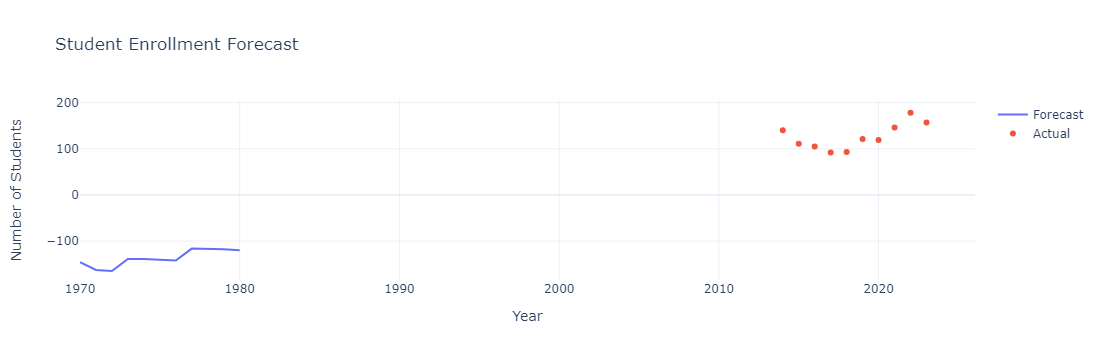

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import torch
import torch.nn as nn
import torch.optim as optim
from prophet import Prophet

# Path to your .xlsx file
file_path = 'Forecasting last.xlsx'

# Read the Excel file
df = pd.read_excel(file_path)

# Rename columns to more meaningful names
df.columns = ['Year', 'Students', 'Forecast_Students', 'Lower_Confidence_Bound', 'Upper_Confidence_Bound']

# Drop the first row as it contains the old column names
df = df.drop(0)

# Reset the index
df = df.reset_index(drop=True)

# Convert the 'Year' column to numeric, handling the non-numeric first row
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna(subset=['Year'])

# Convert relevant columns to numeric
df['Students'] = pd.to_numeric(df['Students'], errors='coerce')

# Use data from 2014 to 2023 for training
train_data = df[(df['Year'] >= 2014) & (df['Year'] <= 2023)].dropna(subset=['Students'])

# Prepare the feature and target variable
train_data = train_data.rename(columns={'Year': 'ds', 'Students': 'y'})
train_data = train_data[['ds', 'y']]

# Initialize Prophet model
prophet_model = Prophet()

# Fit the model with training data
prophet_model.fit(train_data)

# Make future predictions
future_years = prophet_model.make_future_dataframe(periods=10, freq='Y')

# Forecast student enrollment
forecast = prophet_model.predict(future_years)

import plotly.graph_objs as go

# Plot forecast using Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecast'))
fig.add_trace(go.Scatter(x=train_data['ds'], y=train_data['y'], mode='markers', name='Actual'))
fig.update_layout(title='Student Enrollment Forecast',
                  xaxis_title='Year',
                  yaxis_title='Number of Students',
                  template='plotly_white')
fig.show()


Linear Regression - Mean Squared Error: 899.9936459571852, R^2 Score: 0.19804531436205375
K-Nearest Neighbors - Mean Squared Error: 697.7777777777782, R^2 Score: 0.37823321204920635
Support Vector Regressor - Mean Squared Error: 330.37120251865554, R^2 Score: 0.7056171062431227


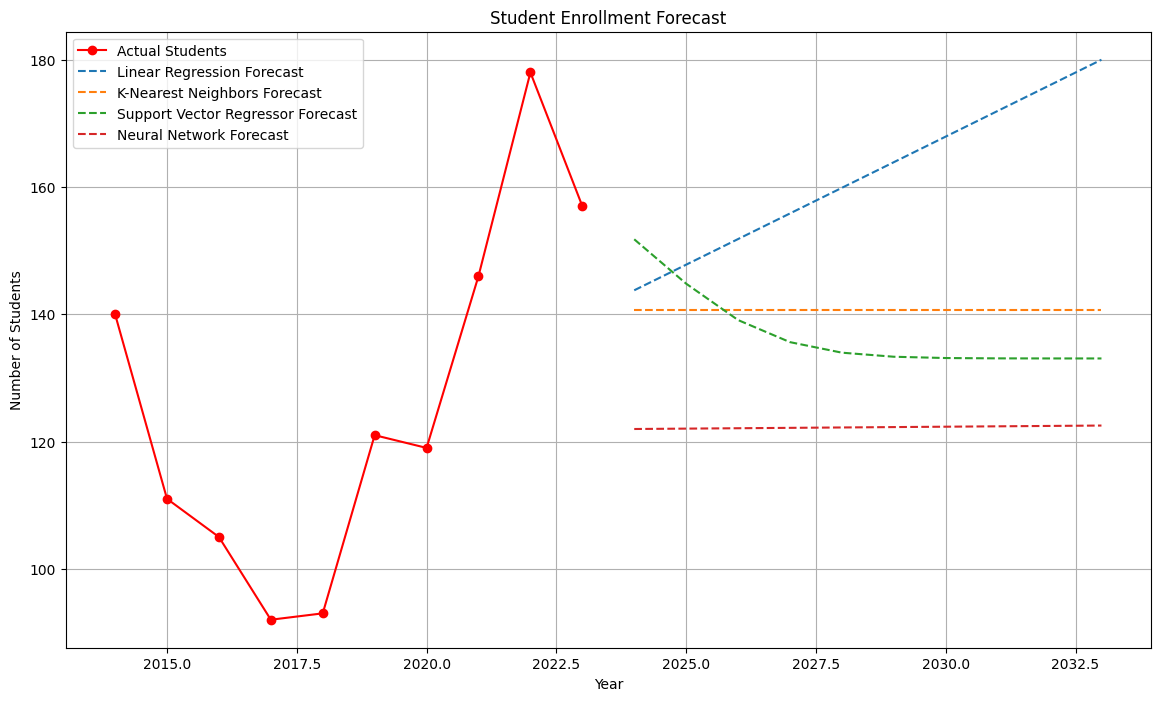

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import torch
import torch.nn as nn
import torch.optim as optim

# Path to your .xlsx file
file_path = 'Forecasting last.xlsx'

# Read the Excel file
df = pd.read_excel(file_path)

# Rename columns to more meaningful names
df.columns = ['Year', 'Students', 'Forecast_Students', 'Lower_Confidence_Bound', 'Upper_Confidence_Bound']

# Drop the first row as it contains the old column names
df = df.drop(0)

# Reset the index
df = df.reset_index(drop=True)

# Convert the 'Year' column to numeric, handling the non-numeric first row
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna(subset=['Year'])

# Convert relevant columns to numeric
df['Students'] = pd.to_numeric(df['Students'], errors='coerce')

# Use data from 2014 to 2023 for training
train_data = df[(df['Year'] >= 2014) & (df['Year'] <= 2023)].dropna(subset=['Students'])

# Prepare the feature and target variable
X = train_data[['Year']]
y = train_data['Students']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=3),
    'Support Vector Regressor': SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
}

# Train and evaluate models
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{name} - Mean Squared Error: {mean_squared_error(y_test, y_pred)}, R^2 Score: {r2_score(y_test, y_pred)}')
    predictions[name] = model.predict(X)

# Neural Network Model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Prepare data for neural network
X_train_nn = torch.tensor(X_train.values, dtype=torch.float32)
y_train_nn = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

# Initialize and train neural network
nn_model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(nn_model.parameters(), lr=0.01)
epochs = 500

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = nn_model(X_train_nn)
    loss = criterion(outputs, y_train_nn)
    loss.backward()
    optimizer.step()

# Make predictions on the training set
with torch.no_grad():
    y_pred_nn = nn_model(torch.tensor(X.values, dtype=torch.float32)).detach().numpy()

# Future predictions (2024-2033)
future_years = pd.DataFrame({'Year': range(2024, 2034)})
future_years_nn = torch.tensor(future_years.values, dtype=torch.float32)

# Make predictions for the future years
future_predictions = {
    'Linear Regression': models['Linear Regression'].predict(future_years),
    'K-Nearest Neighbors': models['K-Nearest Neighbors'].predict(future_years),
    'Support Vector Regressor': models['Support Vector Regressor'].predict(future_years),
    'Neural Network': nn_model(future_years_nn).detach().numpy()
}

# Plot the actual and forecasted data
plt.figure(figsize=(14, 8))
plt.plot(df['Year'], df['Students'], label='Actual Students', marker='o', color='red')

for name, prediction in future_predictions.items():
    plt.plot(future_years, prediction, linestyle='--', label=f'{name} Forecast')

plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.title('Student Enrollment Forecast')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\iNetLab\fullenv\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



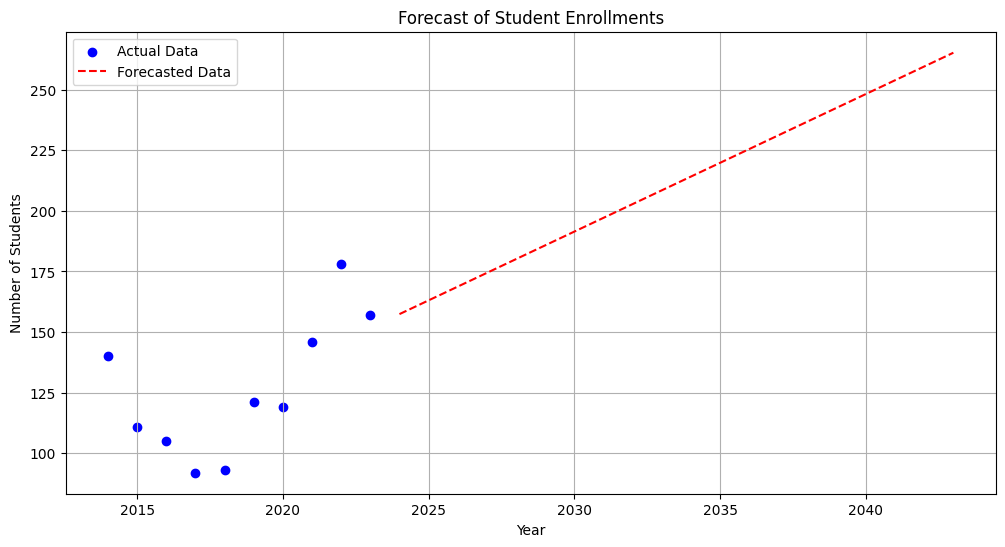

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Assuming 'df' is your DataFrame
# Rename columns for ease of use
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']

# Convert 'Year' to datetime to help with regression analysis
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Extract year from datetime for regression modeling
df['Year'] = df['Year'].dt.year

# For the model, we need to drop rows with NaN in 'Students'
df_actual = df.dropna(subset=['Students'])

# Prepare data for Linear Regression
X = df_actual[['Year']]
y = df_actual['Students']

# Initialize and fit Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = np.arange(2024, 2044).reshape(-1, 1)

# Predict future values
future_preds = model.predict(future_years)

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(df_actual['Year'], df_actual['Students'], color='blue', label='Actual Data')
plt.plot(future_years, future_preds, color='red', linestyle='--', label='Forecasted Data')

plt.title('Forecast of Student Enrollments')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()


    Year  Predicted Students
0   2024          157.400000
1   2025          163.072727
2   2026          168.745455
3   2027          174.418182
4   2028          180.090909
5   2029          185.763636
6   2030          191.436364
7   2031          197.109091
8   2032          202.781818
9   2033          208.454545
10  2034          214.127273
11  2035          219.800000
12  2036          225.472727
13  2037          231.145455
14  2038          236.818182
15  2039          242.490909
16  2040          248.163636
17  2041          253.836364
18  2042          259.509091
19  2043          265.181818


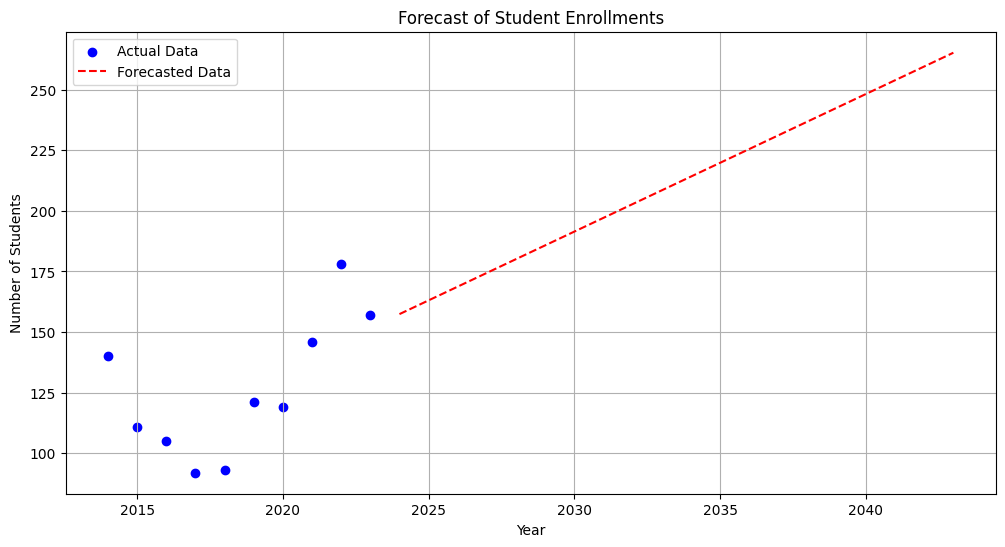

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Assuming 'df' is your DataFrame
# Rename columns for ease of use
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']

# Convert 'Year' to datetime to help with regression analysis
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Extract year from datetime for regression modeling
df['Year'] = df['Year'].dt.year

# For the model, we need to drop rows with NaN in 'Students'
df_actual = df.dropna(subset=['Students'])

# Prepare data for Linear Regression, ensuring it remains a DataFrame
X = df_actual[['Year']]  # Keep as DataFrame
y = df_actual['Students']

# Initialize and fit Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})  # Create DataFrame for future years

# Predict future values using DataFrame to maintain feature names consistency
future_preds = model.predict(future_years)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds
})

# Display the DataFrame
print(predicted_enrollment)

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(df_actual['Year'], df_actual['Students'], color='blue', label='Actual Data')
plt.plot(future_years['Year'], future_preds, color='red', linestyle='--', label='Forecasted Data')

plt.title('Forecast of Student Enrollments')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()


    Year  Predicted Students
0   2024                 157
1   2025                 163
2   2026                 169
3   2027                 174
4   2028                 180
5   2029                 186
6   2030                 191
7   2031                 197
8   2032                 203
9   2033                 208
10  2034                 214
11  2035                 220
12  2036                 225
13  2037                 231
14  2038                 237
15  2039                 242
16  2040                 248
17  2041                 254
18  2042                 260
19  2043                 265


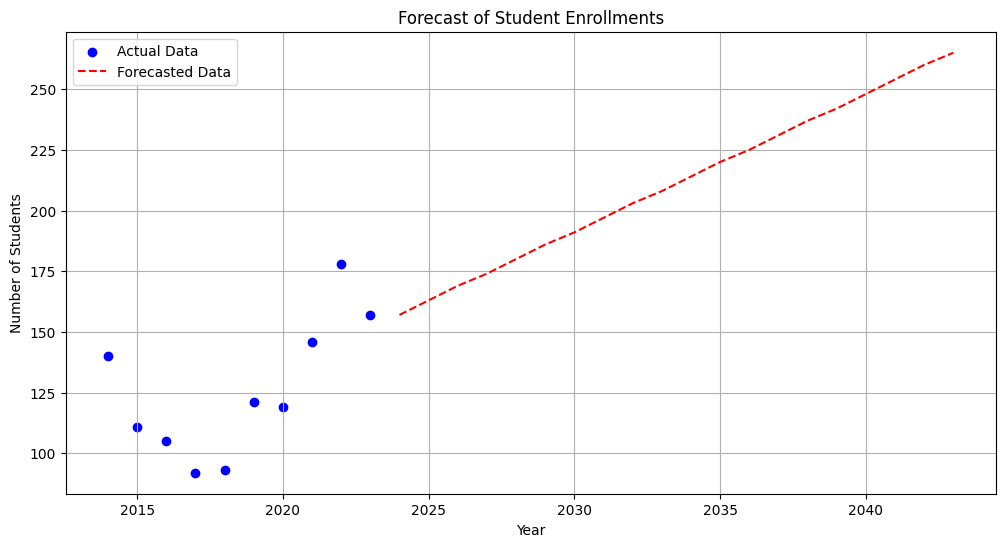

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Assuming 'df' is your DataFrame
# Rename columns for ease of use
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']

# Convert 'Year' to datetime to help with regression analysis
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Extract year from datetime for regression modeling
df['Year'] = df['Year'].dt.year

# For the model, we need to drop rows with NaN in 'Students'
df_actual = df.dropna(subset=['Students'])

# Prepare data for Linear Regression, ensuring it remains a DataFrame
X = df_actual[['Year']]  # Keep as DataFrame
y = df_actual['Students']  # Corrected variable reference

# Initialize and fit Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})  # Create DataFrame for future years

# Predict future values using DataFrame to maintain feature names consistency
future_preds = model.predict(future_years)

# Convert predictions to integers
future_preds_rounded = np.round(future_preds).astype(int)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds_rounded
})

# Display the DataFrame
print(predicted_enrollment)

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(df_actual['Year'], df_actual['Students'], color='blue', label='Actual Data')
plt.plot(future_years['Year'], future_preds_rounded, color='red', linestyle='--', label='Forecasted Data')

plt.title('Forecast of Student Enrollments')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()


In [107]:
import pandas as pd

# Load the data from the second sheet and set the first row as the header explicitly
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=1, header=0)  # header=0 should treat the first row as headers

# Check the DataFrame to ensure the headers are set correctly
print(df.head())
print(df.columns)


  Bachelor of Science in Computer Science Unnamed: 1          Unnamed: 2  \
0                                    Year   Students  Forecast(Students)   
1                                    2014        100                 NaN   
2                                    2015         44                 NaN   
3                                    2016         65                 NaN   
4                                    2017         59                 NaN   

                         Unnamed: 3                        Unnamed: 4  
0  Lower Confidence Bound(Students)  Upper Confidence Bound(Students)  
1                               NaN                               NaN  
2                               NaN                               NaN  
3                               NaN                               NaN  
4                               NaN                               NaN  
Index(['Bachelor of Science in Computer Science', 'Unnamed: 1', 'Unnamed: 2',
       'Unnamed: 3', 'Unnamed: 4'

In [108]:
import pandas as pd

# Load the data from the second sheet, ensuring the first row is used as headers
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=1, header=0)  # Ensures the first row is treated as header

# Check the DataFrame to ensure the headers are set correctly
print(df.head())
print(df.columns)


  Bachelor of Science in Computer Science Unnamed: 1          Unnamed: 2  \
0                                    Year   Students  Forecast(Students)   
1                                    2014        100                 NaN   
2                                    2015         44                 NaN   
3                                    2016         65                 NaN   
4                                    2017         59                 NaN   

                         Unnamed: 3                        Unnamed: 4  
0  Lower Confidence Bound(Students)  Upper Confidence Bound(Students)  
1                               NaN                               NaN  
2                               NaN                               NaN  
3                               NaN                               NaN  
4                               NaN                               NaN  
Index(['Bachelor of Science in Computer Science', 'Unnamed: 1', 'Unnamed: 2',
       'Unnamed: 3', 'Unnamed: 4'

In [111]:
import pandas as pd

# Load the data from the second sheet
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=1)

# Print the first few rows to understand what we are dealing with
print(df.head())
print(df.columns)  # This will show the actual columns names


  Bachelor of Science in Computer Science Unnamed: 1          Unnamed: 2  \
0                                    Year   Students  Forecast(Students)   
1                                    2014        100                 NaN   
2                                    2015         44                 NaN   
3                                    2016         65                 NaN   
4                                    2017         59                 NaN   

                         Unnamed: 3                        Unnamed: 4  
0  Lower Confidence Bound(Students)  Upper Confidence Bound(Students)  
1                               NaN                               NaN  
2                               NaN                               NaN  
3                               NaN                               NaN  
4                               NaN                               NaN  
Index(['Bachelor of Science in Computer Science', 'Unnamed: 1', 'Unnamed: 2',
       'Unnamed: 3', 'Unnamed: 4'

    Year  Predicted Students
0   2024                 221
1   2025                 239
2   2026                 258
3   2027                 276
4   2028                 294
5   2029                 312
6   2030                 330
7   2031                 348
8   2032                 367
9   2033                 385
10  2034                 403
11  2035                 421
12  2036                 439
13  2037                 457
14  2038                 475
15  2039                 494
16  2040                 512
17  2041                 530
18  2042                 548
19  2043                 566


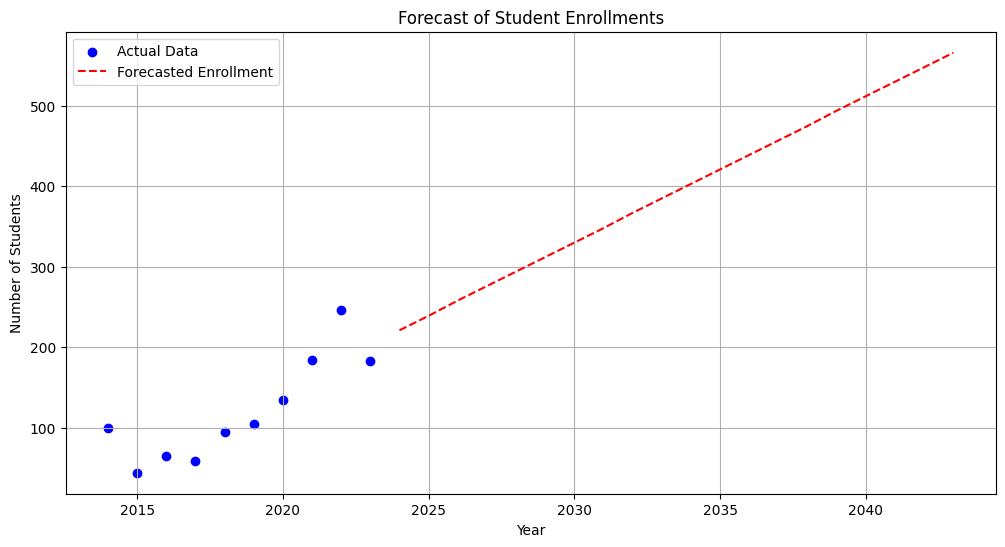

In [113]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=1, header=0)  # Ensure headers are correctly used

# If necessary, explicitly set the correct headers again
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.drop(0)  # Drop the first row if it contains the header names again

# Convert 'Year' to numeric, handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Clean data: remove any rows where 'Year' or 'Students' might be NaN
df = df.dropna(subset=['Year', 'Students'])

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})

# Predict future values
future_preds = model.predict(future_years)

# Convert predictions to integers for practical use
future_preds_rounded = np.round(future_preds).astype(int)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds_rounded
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='blue', label='Actual Data')
plt.plot(future_years['Year'], future_preds_rounded, color='red', linestyle='--', label='Forecasted Enrollment')
plt.title('Forecast of Student Enrollments')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()


    Year  Predicted Students
0   2024                 185
1   2025                 196
2   2026                 207
3   2027                 218
4   2028                 228
5   2029                 239
6   2030                 250
7   2031                 261
8   2032                 272
9   2033                 283
10  2034                 293
11  2035                 304
12  2036                 315
13  2037                 326
14  2038                 337
15  2039                 348
16  2040                 358
17  2041                 369
18  2042                 380
19  2043                 391


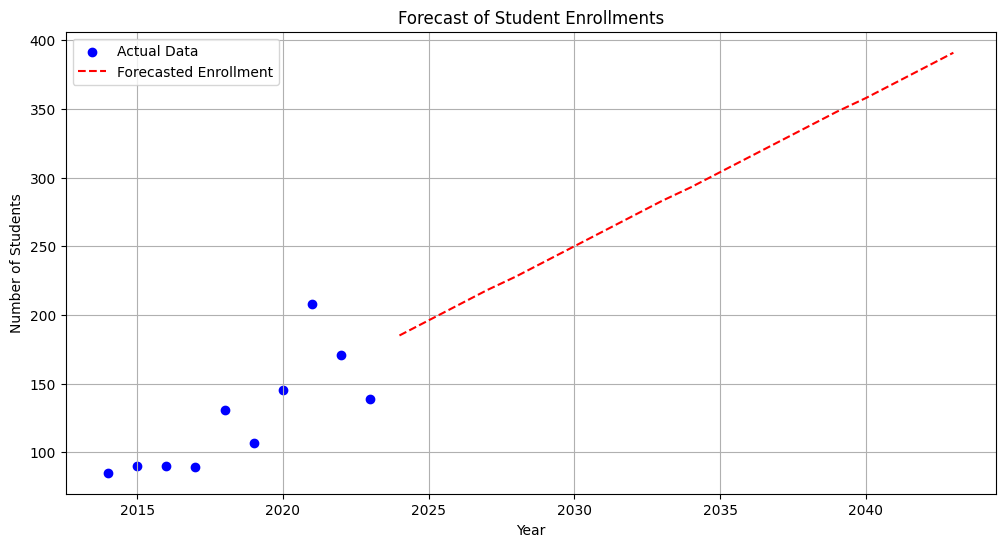

In [114]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=2, header=0)  # Ensure headers are correctly used

# If necessary, explicitly set the correct headers again
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.drop(0)  # Drop the first row if it contains the header names again

# Convert 'Year' to numeric, handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Clean data: remove any rows where 'Year' or 'Students' might be NaN
df = df.dropna(subset=['Year', 'Students'])

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})

# Predict future values
future_preds = model.predict(future_years)

# Convert predictions to integers for practical use
future_preds_rounded = np.round(future_preds).astype(int)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds_rounded
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='blue', label='Actual Data')
plt.plot(future_years['Year'], future_preds_rounded, color='red', linestyle='--', label='Forecasted Enrollment')
plt.title('Forecast of Student Enrollments')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()


    Year  Predicted Students
0   2024                  21
1   2025                  23
2   2026                  25
3   2027                  26
4   2028                  28
5   2029                  30
6   2030                  32
7   2031                  34
8   2032                  36
9   2033                  38
10  2034                  40
11  2035                  42
12  2036                  44
13  2037                  46
14  2038                  48
15  2039                  49
16  2040                  51
17  2041                  53
18  2042                  55
19  2043                  57


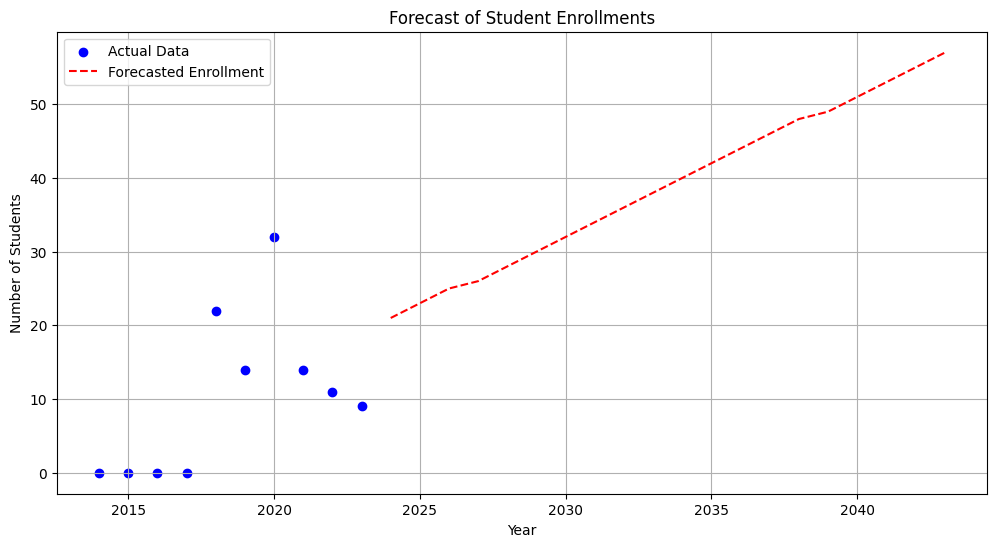

In [115]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=3, header=0)  # Ensure headers are correctly used

# If necessary, explicitly set the correct headers again
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.drop(0)  # Drop the first row if it contains the header names again

# Convert 'Year' to numeric, handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Clean data: remove any rows where 'Year' or 'Students' might be NaN
df = df.dropna(subset=['Year', 'Students'])

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})

# Predict future values
future_preds = model.predict(future_years)

# Convert predictions to integers for practical use
future_preds_rounded = np.round(future_preds).astype(int)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds_rounded
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='blue', label='Actual Data')
plt.plot(future_years['Year'], future_preds_rounded, color='red', linestyle='--', label='Forecasted Enrollment')
plt.title('Forecast of Student Enrollments')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()

    Year  Predicted Students
0   2024                  68
1   2025                  67
2   2026                  65
3   2027                  63
4   2028                  62
5   2029                  60
6   2030                  58
7   2031                  56
8   2032                  55
9   2033                  53
10  2034                  51
11  2035                  50
12  2036                  48
13  2037                  46
14  2038                  44
15  2039                  43
16  2040                  41
17  2041                  39
18  2042                  38
19  2043                  36


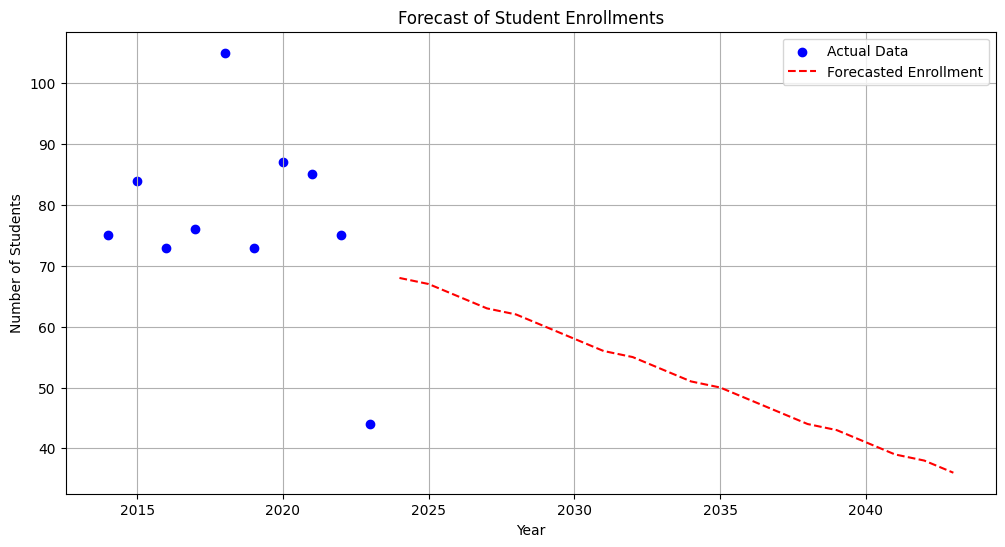

In [116]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=4, header=0)  # Ensure headers are correctly used

# If necessary, explicitly set the correct headers again
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.drop(0)  # Drop the first row if it contains the header names again

# Convert 'Year' to numeric, handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Clean data: remove any rows where 'Year' or 'Students' might be NaN
df = df.dropna(subset=['Year', 'Students'])

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})

# Predict future values
future_preds = model.predict(future_years)

# Convert predictions to integers for practical use
future_preds_rounded = np.round(future_preds).astype(int)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds_rounded
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='blue', label='Actual Data')
plt.plot(future_years['Year'], future_preds_rounded, color='red', linestyle='--', label='Forecasted Enrollment')
plt.title('Forecast of Student Enrollments')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()

    Year  Predicted Students
0   2024                  37
1   2025                  37
2   2026                  38
3   2027                  38
4   2028                  38
5   2029                  39
6   2030                  39
7   2031                  39
8   2032                  40
9   2033                  40
10  2034                  40
11  2035                  41
12  2036                  41
13  2037                  41
14  2038                  42
15  2039                  42
16  2040                  42
17  2041                  43
18  2042                  43
19  2043                  43


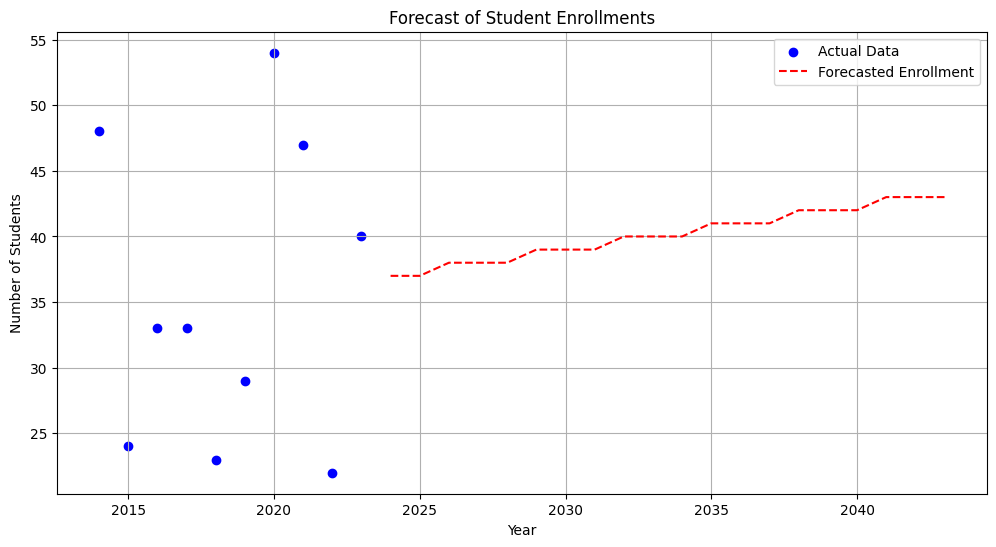

In [117]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=5, header=0)  # Ensure headers are correctly used

# If necessary, explicitly set the correct headers again
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.drop(0)  # Drop the first row if it contains the header names again

# Convert 'Year' to numeric, handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Clean data: remove any rows where 'Year' or 'Students' might be NaN
df = df.dropna(subset=['Year', 'Students'])

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})

# Predict future values
future_preds = model.predict(future_years)

# Convert predictions to integers for practical use
future_preds_rounded = np.round(future_preds).astype(int)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds_rounded
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='blue', label='Actual Data')
plt.plot(future_years['Year'], future_preds_rounded, color='red', linestyle='--', label='Forecasted Enrollment')
plt.title('Forecast of Student Enrollments')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()

    Year  Predicted Students
0   2024                   5
1   2025                   5
2   2026                   4
3   2027                   4
4   2028                   4
5   2029                   4
6   2030                   3
7   2031                   3
8   2032                   3
9   2033                   3
10  2034                   2
11  2035                   2
12  2036                   2
13  2037                   2
14  2038                   1
15  2039                   1
16  2040                   1
17  2041                   0
18  2042                   0
19  2043                   0


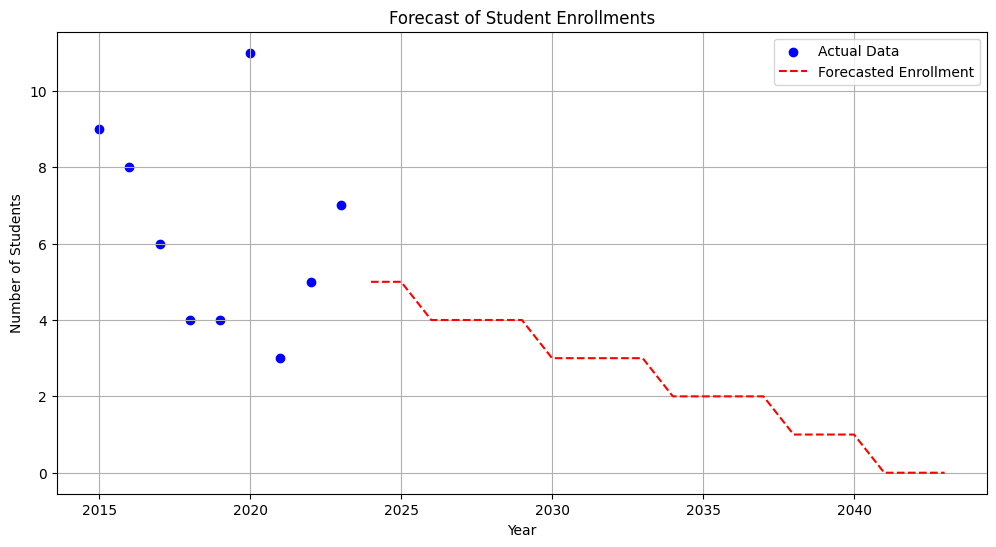

In [118]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=6, header=0)  # Ensure headers are correctly used

# If necessary, explicitly set the correct headers again
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.drop(0)  # Drop the first row if it contains the header names again

# Convert 'Year' to numeric, handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Clean data: remove any rows where 'Year' or 'Students' might be NaN
df = df.dropna(subset=['Year', 'Students'])

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})

# Predict future values
future_preds = model.predict(future_years)

# Convert predictions to integers for practical use
future_preds_rounded = np.round(future_preds).astype(int)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds_rounded
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='blue', label='Actual Data')
plt.plot(future_years['Year'], future_preds_rounded, color='red', linestyle='--', label='Forecasted Enrollment')
plt.title('Forecast of Student Enrollments')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()

    Year  Predicted Students
0   2024                  39
1   2025                  39
2   2026                  38
3   2027                  37
4   2028                  37
5   2029                  36
6   2030                  36
7   2031                  35
8   2032                  34
9   2033                  34
10  2034                  33
11  2035                  32
12  2036                  32
13  2037                  31
14  2038                  31
15  2039                  30
16  2040                  29
17  2041                  29
18  2042                  28
19  2043                  28


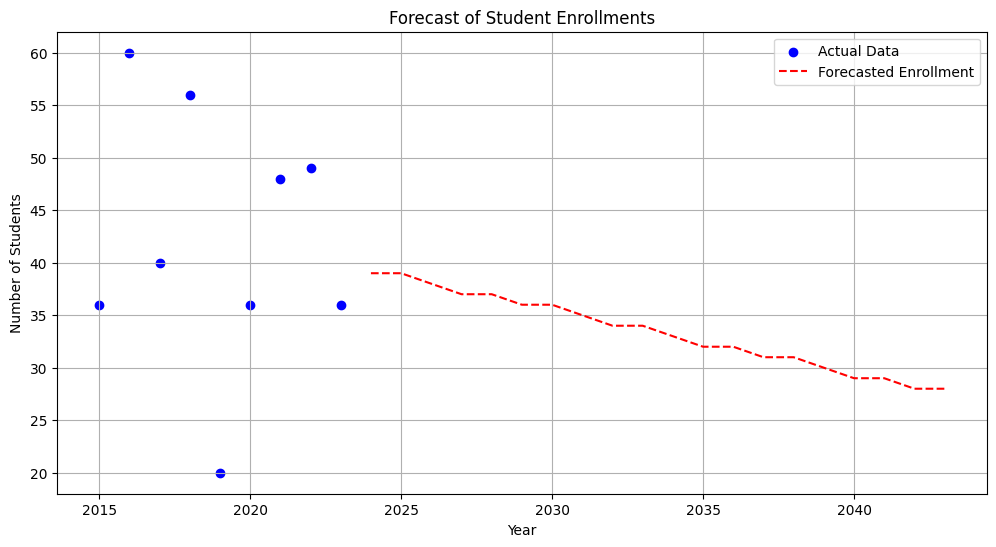

In [119]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=7, header=0)  # Ensure headers are correctly used

# If necessary, explicitly set the correct headers again
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.drop(0)  # Drop the first row if it contains the header names again

# Convert 'Year' to numeric, handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Clean data: remove any rows where 'Year' or 'Students' might be NaN
df = df.dropna(subset=['Year', 'Students'])

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})

# Predict future values
future_preds = model.predict(future_years)

# Convert predictions to integers for practical use
future_preds_rounded = np.round(future_preds).astype(int)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds_rounded
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='blue', label='Actual Data')
plt.plot(future_years['Year'], future_preds_rounded, color='red', linestyle='--', label='Forecasted Enrollment')
plt.title('Forecast of Student Enrollments')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()

    Year  Predicted Students
0   2024                  85
1   2025                  85
2   2026                  85
3   2027                  85
4   2028                  85
5   2029                  85
6   2030                  85
7   2031                  85
8   2032                  85
9   2033                  85
10  2034                  85
11  2035                  85
12  2036                  85
13  2037                  86
14  2038                  86
15  2039                  86
16  2040                  86
17  2041                  86
18  2042                  86
19  2043                  86


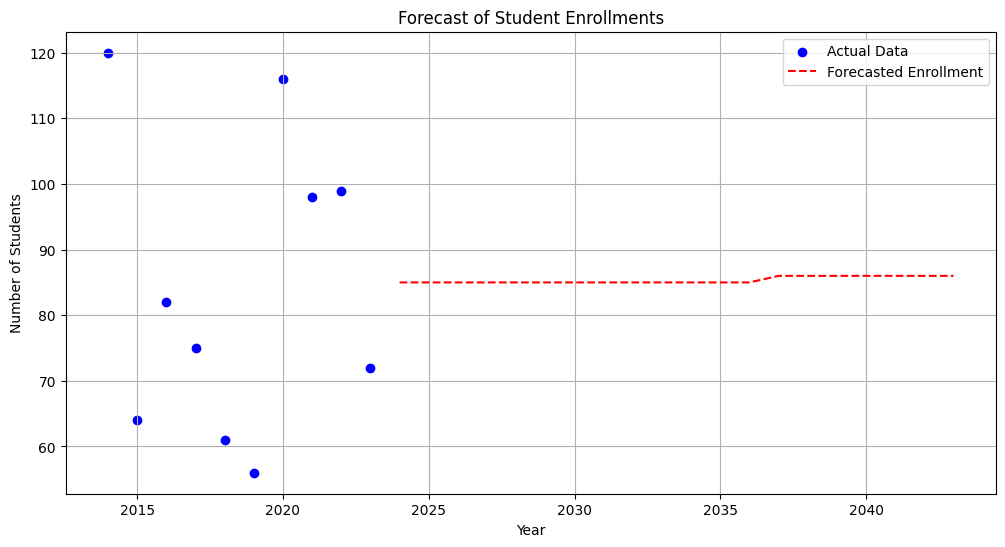

In [120]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=8, header=0)  # Ensure headers are correctly used

# If necessary, explicitly set the correct headers again
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.drop(0)  # Drop the first row if it contains the header names again

# Convert 'Year' to numeric, handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Clean data: remove any rows where 'Year' or 'Students' might be NaN
df = df.dropna(subset=['Year', 'Students'])

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})

# Predict future values
future_preds = model.predict(future_years)

# Convert predictions to integers for practical use
future_preds_rounded = np.round(future_preds).astype(int)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds_rounded
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='blue', label='Actual Data')
plt.plot(future_years['Year'], future_preds_rounded, color='red', linestyle='--', label='Forecasted Enrollment')
plt.title('Forecast of Student Enrollments')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()

    Year  Predicted Students
0   2024                  80
1   2025                  69
2   2026                  58
3   2027                  47
4   2028                  36
5   2029                  25
6   2030                  14
7   2031                   3
8   2032                   0
9   2033                   0
10  2034                   0
11  2035                   0
12  2036                   0
13  2037                   0
14  2038                   0
15  2039                   0
16  2040                   0
17  2041                   0
18  2042                   0
19  2043                   0


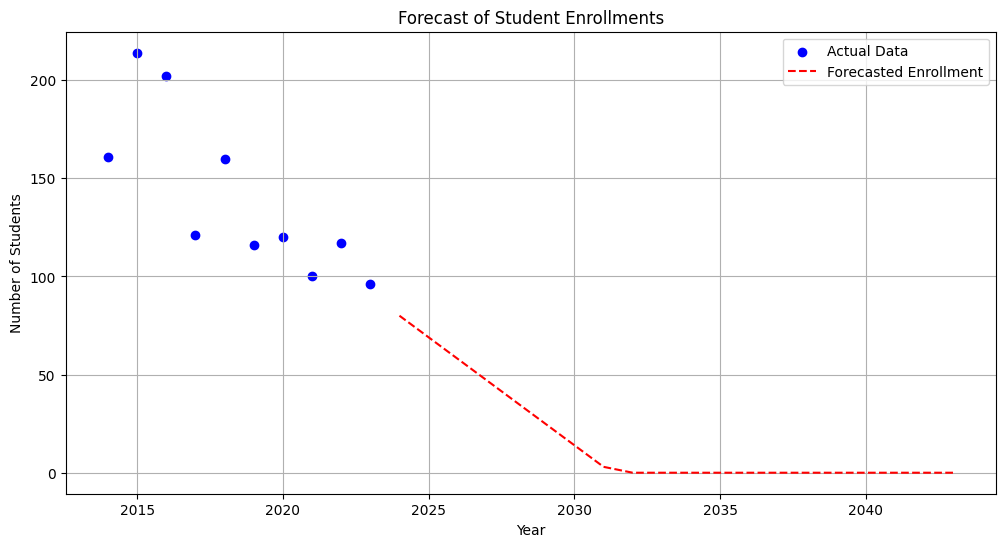

In [123]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=9, header=0)  # Assume sheet_name=1 is correct, adjust if needed

# If necessary, set correct headers
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.drop(0)  # Assuming first row needs to be dropped

# Convert 'Year' to numeric, handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Clean data: remove rows where 'Year' or 'Students' might be NaN
df = df.dropna(subset=['Year', 'Students'])

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})

# Predict future values
future_preds = model.predict(future_years)

# Ensure predictions are non-negative
future_preds_rounded = np.round(future_preds).clip(min=0).astype(int)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds_rounded
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='blue', label='Actual Data')
plt.plot(future_years['Year'], future_preds_rounded, color='red', linestyle='--', label='Forecasted Enrollment')
plt.title('Forecast of Student Enrollments')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()


    Year  Predicted Students
0   2024                  52
1   2025                  55
2   2026                  58
3   2027                  61
4   2028                  64
5   2029                  68
6   2030                  71
7   2031                  74
8   2032                  77
9   2033                  80
10  2034                  84
11  2035                  87
12  2036                  90
13  2037                  93
14  2038                  96
15  2039                 100
16  2040                 103
17  2041                 106
18  2042                 109
19  2043                 112


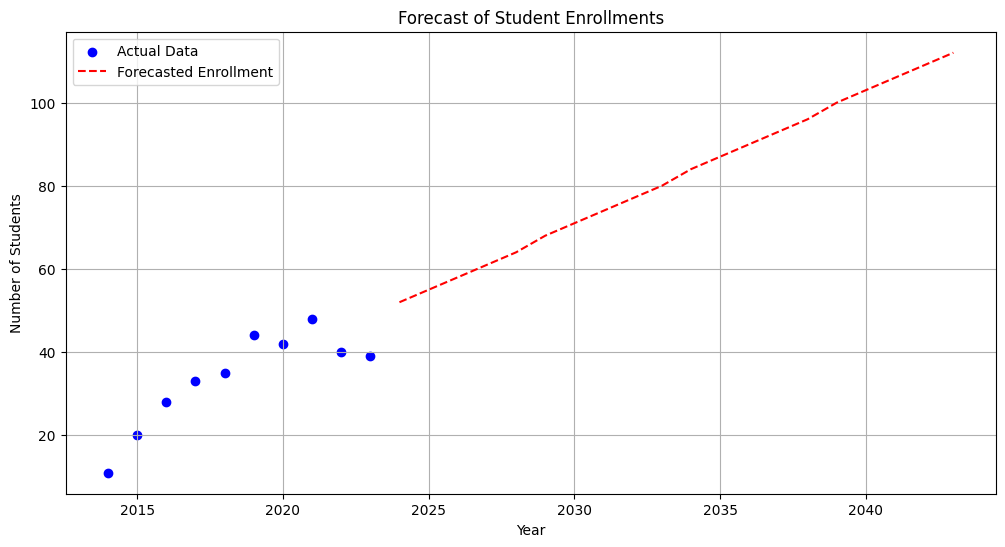

In [124]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=10, header=0)  # Assume sheet_name=1 is correct, adjust if needed

# If necessary, set correct headers
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.drop(0)  # Assuming first row needs to be dropped

# Convert 'Year' to numeric, handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Clean data: remove rows where 'Year' or 'Students' might be NaN
df = df.dropna(subset=['Year', 'Students'])

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})

# Predict future values
future_preds = model.predict(future_years)

# Ensure predictions are non-negative
future_preds_rounded = np.round(future_preds).clip(min=0).astype(int)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds_rounded
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='blue', label='Actual Data')
plt.plot(future_years['Year'], future_preds_rounded, color='red', linestyle='--', label='Forecasted Enrollment')
plt.title('Forecast of Student Enrollments')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()


    Year  Predicted Students
0   2024                  41
1   2025                  36
2   2026                  32
3   2027                  28
4   2028                  24
5   2029                  19
6   2030                  15
7   2031                  11
8   2032                   6
9   2033                   2
10  2034                   0
11  2035                   0
12  2036                   0
13  2037                   0
14  2038                   0
15  2039                   0
16  2040                   0
17  2041                   0
18  2042                   0
19  2043                   0


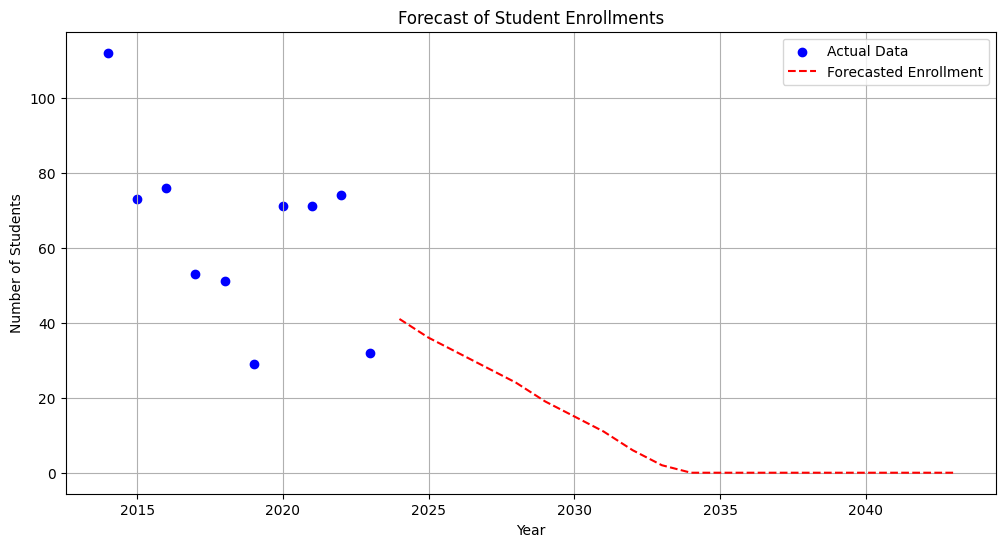

In [125]:
#MEDICINE AND SURGERY
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=11, header=0)  # Assume sheet_name=1 is correct, adjust if needed

# If necessary, set correct headers
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.drop(0)  # Assuming first row needs to be dropped

# Convert 'Year' to numeric, handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Clean data: remove rows where 'Year' or 'Students' might be NaN
df = df.dropna(subset=['Year', 'Students'])

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})

# Predict future values
future_preds = model.predict(future_years)

# Ensure predictions are non-negative
future_preds_rounded = np.round(future_preds).clip(min=0).astype(int)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds_rounded
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='blue', label='Actual Data')
plt.plot(future_years['Year'], future_preds_rounded, color='red', linestyle='--', label='Forecasted Enrollment')
plt.title('Forecast of Student Enrollments')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()


    Year  Predicted Students
0   2024                  38
1   2025                  40
2   2026                  42
3   2027                  44
4   2028                  46
5   2029                  48
6   2030                  50
7   2031                  52
8   2032                  54
9   2033                  56
10  2034                  58
11  2035                  60
12  2036                  62
13  2037                  64
14  2038                  65
15  2039                  67
16  2040                  69
17  2041                  71
18  2042                  73
19  2043                  75


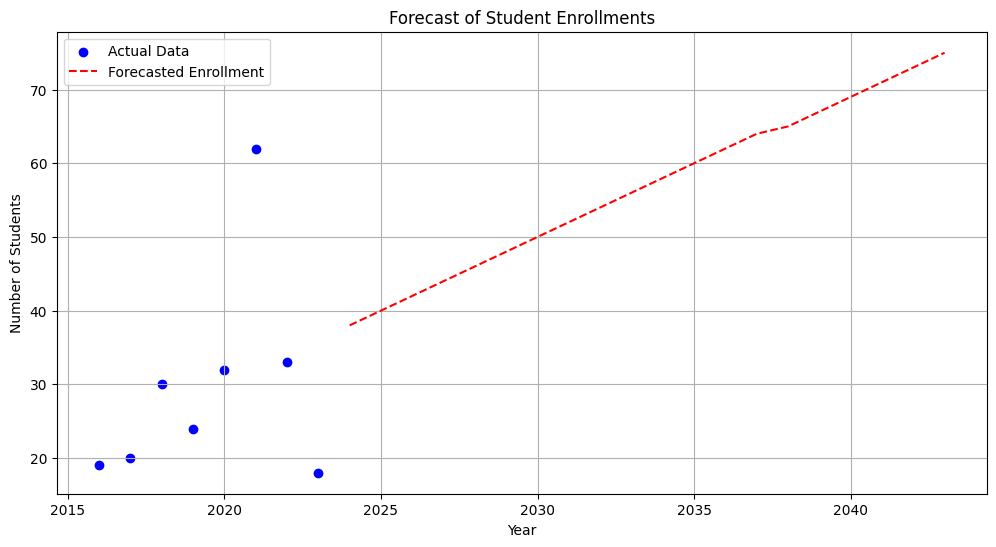

In [126]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=12, header=0)  # Assume sheet_name=1 is correct, adjust if needed

# If necessary, set correct headers
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.drop(0)  # Assuming first row needs to be dropped

# Convert 'Year' to numeric, handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Clean data: remove rows where 'Year' or 'Students' might be NaN
df = df.dropna(subset=['Year', 'Students'])

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})

# Predict future values
future_preds = model.predict(future_years)

# Ensure predictions are non-negative
future_preds_rounded = np.round(future_preds).clip(min=0).astype(int)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds_rounded
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='blue', label='Actual Data')
plt.plot(future_years['Year'], future_preds_rounded, color='red', linestyle='--', label='Forecasted Enrollment')
plt.title('Forecast of Student Enrollments')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()


    Year  Predicted Students
0   2024                  36
1   2025                  40
2   2026                  43
3   2027                  46
4   2028                  49
5   2029                  52
6   2030                  56
7   2031                  59
8   2032                  62
9   2033                  65
10  2034                  68
11  2035                  72
12  2036                  75
13  2037                  78
14  2038                  81
15  2039                  85
16  2040                  88
17  2041                  91
18  2042                  94
19  2043                  97


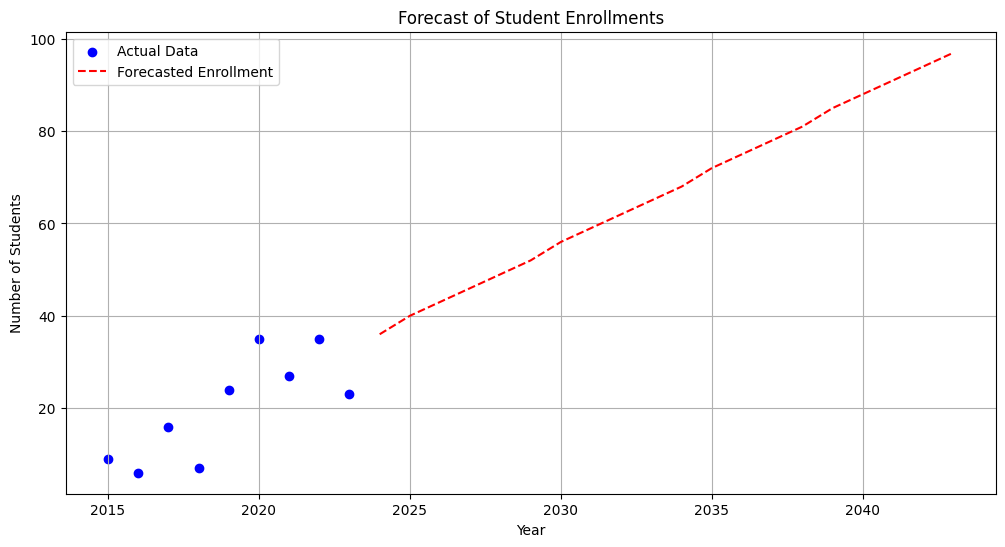

In [127]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=13, header=0)  # Assume sheet_name=1 is correct, adjust if needed

# If necessary, set correct headers
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.drop(0)  # Assuming first row needs to be dropped

# Convert 'Year' to numeric, handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Clean data: remove rows where 'Year' or 'Students' might be NaN
df = df.dropna(subset=['Year', 'Students'])

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})

# Predict future values
future_preds = model.predict(future_years)

# Ensure predictions are non-negative
future_preds_rounded = np.round(future_preds).clip(min=0).astype(int)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds_rounded
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='blue', label='Actual Data')
plt.plot(future_years['Year'], future_preds_rounded, color='red', linestyle='--', label='Forecasted Enrollment')
plt.title('Forecast of Student Enrollments')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()


    Year  Predicted Students
0   2024                  27
1   2025                  28
2   2026                  29
3   2027                  30
4   2028                  31
5   2029                  32
6   2030                  34
7   2031                  35
8   2032                  36
9   2033                  37
10  2034                  38
11  2035                  40
12  2036                  41
13  2037                  42
14  2038                  43
15  2039                  44
16  2040                  45
17  2041                  47
18  2042                  48
19  2043                  49


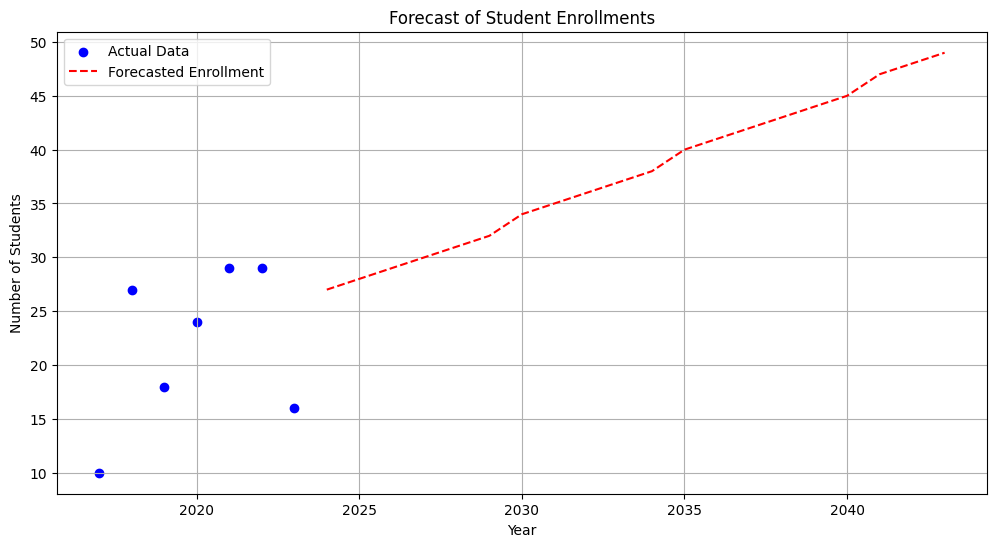

In [128]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=14, header=0)  # Assume sheet_name=1 is correct, adjust if needed

# If necessary, set correct headers
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.drop(0)  # Assuming first row needs to be dropped

# Convert 'Year' to numeric, handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Clean data: remove rows where 'Year' or 'Students' might be NaN
df = df.dropna(subset=['Year', 'Students'])

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})

# Predict future values
future_preds = model.predict(future_years)

# Ensure predictions are non-negative
future_preds_rounded = np.round(future_preds).clip(min=0).astype(int)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds_rounded
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='blue', label='Actual Data')
plt.plot(future_years['Year'], future_preds_rounded, color='red', linestyle='--', label='Forecasted Enrollment')
plt.title('Forecast of Student Enrollments')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()


    Year  Predicted Students
0   2024                  43
1   2025                  46
2   2026                  48
3   2027                  51
4   2028                  53
5   2029                  56
6   2030                  59
7   2031                  61
8   2032                  64
9   2033                  67
10  2034                  69
11  2035                  72
12  2036                  75
13  2037                  77
14  2038                  80
15  2039                  83
16  2040                  85
17  2041                  88
18  2042                  91
19  2043                  93


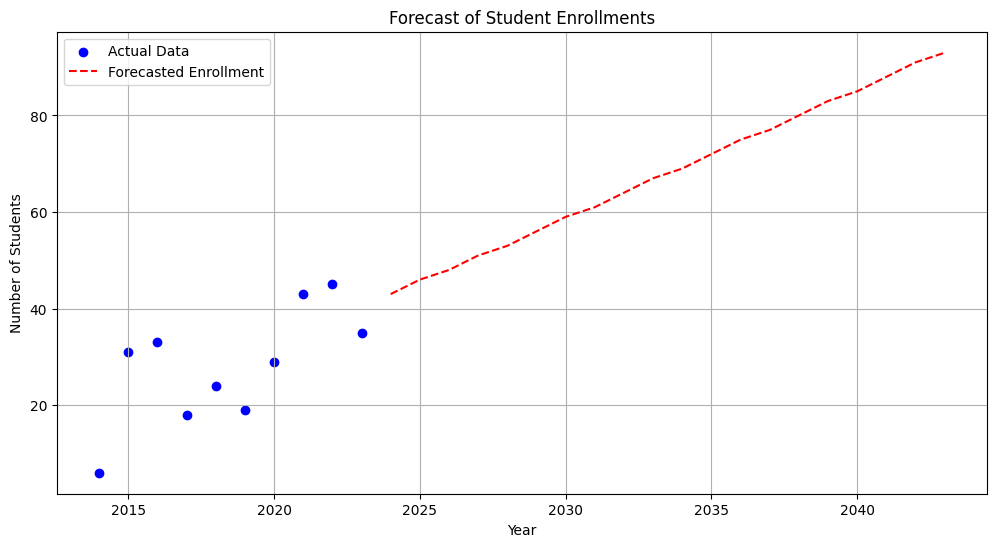

In [129]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=15, header=0)  # Assume sheet_name=1 is correct, adjust if needed

# If necessary, set correct headers
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.drop(0)  # Assuming first row needs to be dropped

# Convert 'Year' to numeric, handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Clean data: remove rows where 'Year' or 'Students' might be NaN
df = df.dropna(subset=['Year', 'Students'])

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})

# Predict future values
future_preds = model.predict(future_years)

# Ensure predictions are non-negative
future_preds_rounded = np.round(future_preds).clip(min=0).astype(int)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds_rounded
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='blue', label='Actual Data')
plt.plot(future_years['Year'], future_preds_rounded, color='red', linestyle='--', label='Forecasted Enrollment')
plt.title('Forecast of Student Enrollments')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()


    Year  Predicted Students
0   2024                  31
1   2025                  26
2   2026                  21
3   2027                  16
4   2028                  11
5   2029                   6
6   2030                   1
7   2031                   0
8   2032                   0
9   2033                   0
10  2034                   0
11  2035                   0
12  2036                   0
13  2037                   0
14  2038                   0
15  2039                   0
16  2040                   0
17  2041                   0
18  2042                   0
19  2043                   0


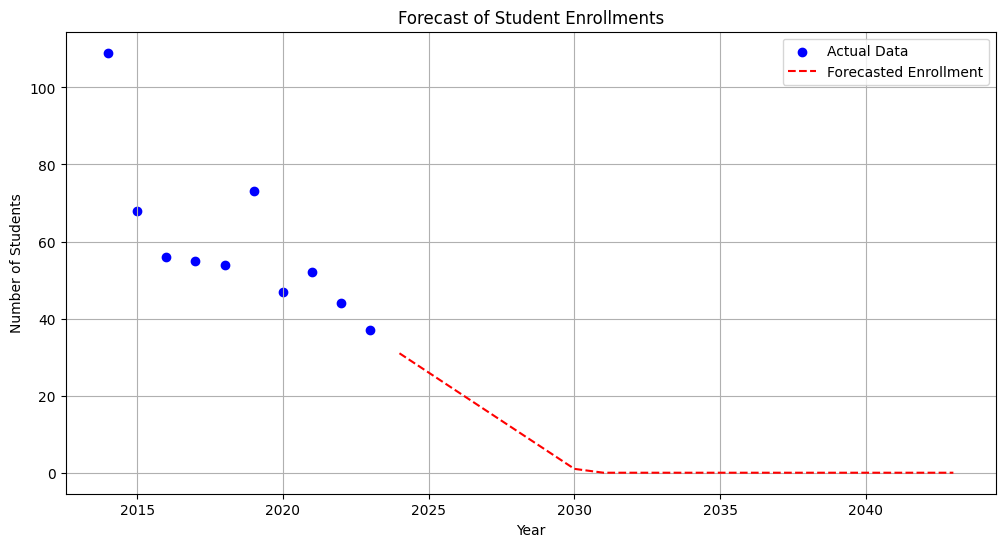

In [130]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=16, header=0)  # Assume sheet_name=1 is correct, adjust if needed

# If necessary, set correct headers
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.drop(0)  # Assuming first row needs to be dropped

# Convert 'Year' to numeric, handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Clean data: remove rows where 'Year' or 'Students' might be NaN
df = df.dropna(subset=['Year', 'Students'])

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})

# Predict future values
future_preds = model.predict(future_years)

# Ensure predictions are non-negative
future_preds_rounded = np.round(future_preds).clip(min=0).astype(int)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds_rounded
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='blue', label='Actual Data')
plt.plot(future_years['Year'], future_preds_rounded, color='red', linestyle='--', label='Forecasted Enrollment')
plt.title('Forecast of Student Enrollments')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()


    Year  Predicted Students
0   2024                  29
1   2025                  33
2   2026                  37
3   2027                  41
4   2028                  44
5   2029                  48
6   2030                  52
7   2031                  56
8   2032                  60
9   2033                  64
10  2034                  68
11  2035                  72
12  2036                  76
13  2037                  80
14  2038                  84
15  2039                  87
16  2040                  91
17  2041                  95
18  2042                  99
19  2043                 103


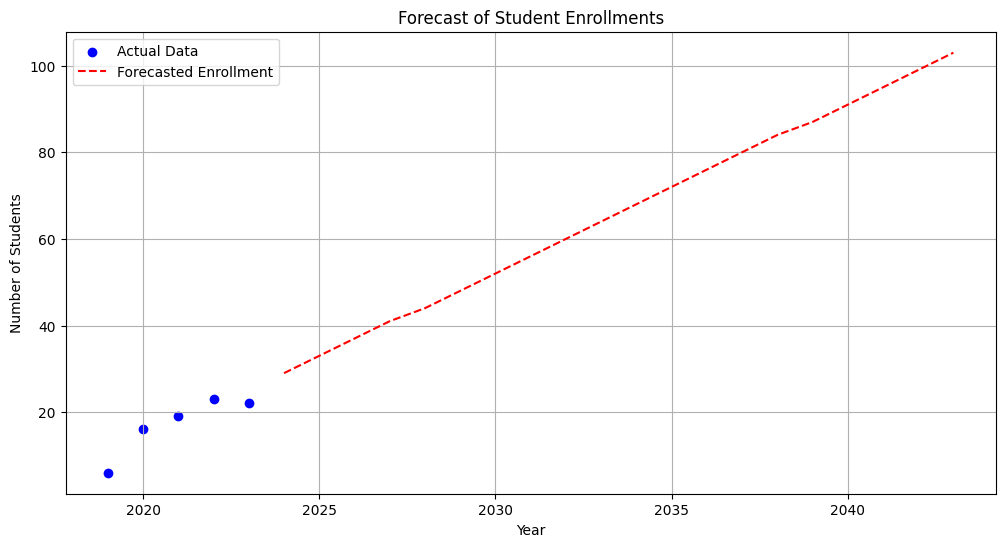

In [131]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=17, header=0)  # Assume sheet_name=1 is correct, adjust if needed

# If necessary, set correct headers
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.drop(0)  # Assuming first row needs to be dropped

# Convert 'Year' to numeric, handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Clean data: remove rows where 'Year' or 'Students' might be NaN
df = df.dropna(subset=['Year', 'Students'])

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})

# Predict future values
future_preds = model.predict(future_years)

# Ensure predictions are non-negative
future_preds_rounded = np.round(future_preds).clip(min=0).astype(int)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds_rounded
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='blue', label='Actual Data')
plt.plot(future_years['Year'], future_preds_rounded, color='red', linestyle='--', label='Forecasted Enrollment')
plt.title('Forecast of Student Enrollments')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()


    Year  Predicted Students
0   2024                1382
1   2025                1431
2   2026                1480
3   2027                1529
4   2028                1579
5   2029                1628
6   2030                1677
7   2031                1726
8   2032                1776
9   2033                1825
10  2034                1874
11  2035                1923
12  2036                1973
13  2037                2022
14  2038                2071
15  2039                2121
16  2040                2170
17  2041                2219
18  2042                2268
19  2043                2318


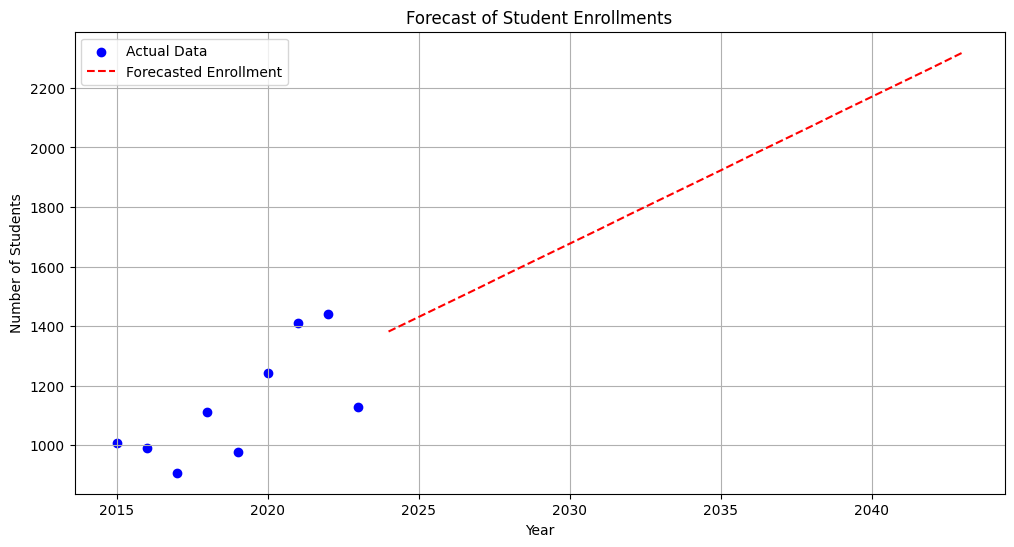

In [132]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=18, header=0)  # Assume sheet_name=1 is correct, adjust if needed

# If necessary, set correct headers
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.drop(0)  # Assuming first row needs to be dropped

# Convert 'Year' to numeric, handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Clean data: remove rows where 'Year' or 'Students' might be NaN
df = df.dropna(subset=['Year', 'Students'])

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})

# Predict future values
future_preds = model.predict(future_years)

# Ensure predictions are non-negative
future_preds_rounded = np.round(future_preds).clip(min=0).astype(int)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds_rounded
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='blue', label='Actual Data')
plt.plot(future_years['Year'], future_preds_rounded, color='red', linestyle='--', label='Forecasted Enrollment')
plt.title('Forecast of Student Enrollments')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()


In [136]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=3, header=0)  # Adjust sheet_name as necessary

# Set correct headers if needed
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.drop(0)  # Assuming the first row is headers

# Ensure 'Year' is datetime type and 'Students' is numeric
df['Year'] = pd.to_datetime(df['Year'], format='%Y', errors='coerce')
df['Students'] = pd.to_numeric(df['Students'], errors='coerce')

# Drop any rows with NaN values that might disrupt the model
df = df.dropna(subset=['Year', 'Students'])

# Set 'Year' as the index
df.set_index('Year', inplace=True)

# Check data types and values to ensure correctness
print(df.dtypes)
print(df.head())


Students                  float64
Forecast                   object
Lower Confidence Bound     object
Upper Confidence Limit     object
dtype: object
            Students Forecast Lower Confidence Bound Upper Confidence Limit
Year                                                                       
2014-01-01       0.0      NaN                    NaN                    NaN
2015-01-01       0.0      NaN                    NaN                    NaN
2016-01-01       0.0      NaN                    NaN                    NaN
2017-01-01       0.0      NaN                    NaN                    NaN
2018-01-01      22.0      NaN                    NaN                    NaN


                 Year  Predicted Students  Lower CI  Upper CI
2024-01-01 2024-12-31                  10         0        30
2025-01-01 2025-12-31                   9         0        32
2026-01-01 2026-12-31                  10         0        39
2027-01-01 2027-12-31                  10         0        42
2028-01-01 2028-12-31                  10         0        46
2029-01-01 2029-12-31                  10         0        48
2030-01-01 2030-12-31                  10         0        52
2031-01-01 2031-12-31                  10         0        54
2032-01-01 2032-12-31                  10         0        57
2033-01-01 2033-12-31                  10         0        59
2034-01-01 2034-12-31                  10         0        62
2035-01-01 2035-12-31                  10         0        64
2036-01-01 2036-12-31                  10         0        66
2037-01-01 2037-12-31                  10         0        68
2038-01-01 2038-12-31                  10         0        70
2039-01-

C:\Users\iNetLab\fullenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

C:\Users\iNetLab\fullenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

C:\Users\iNetLab\fullenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

C:\Users\iNetLab\AppData\Local\Temp\ipykernel_32028\2128197860.py:22: FutureWarning:

'A-DEC' is deprecated and will be removed in a future version, please use 'YE-DEC' instead.



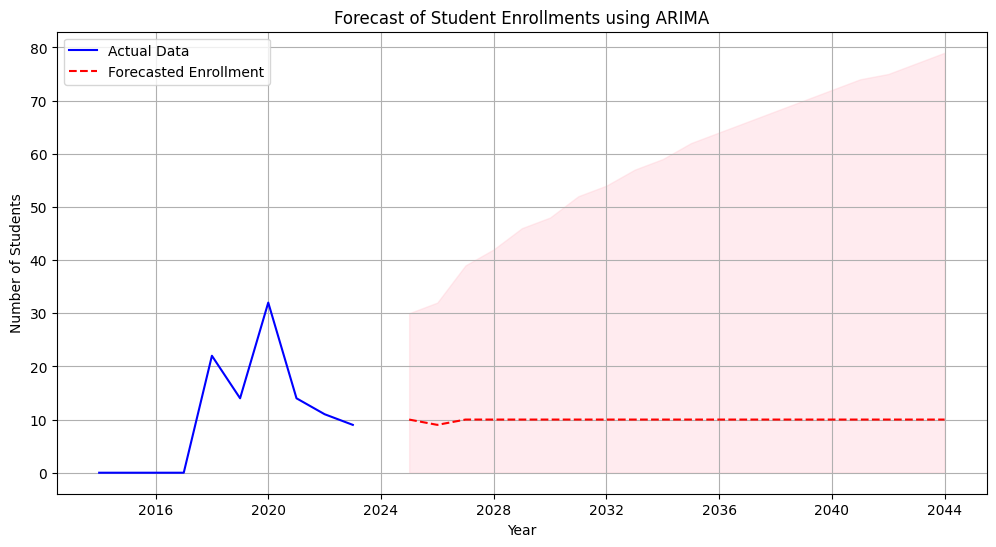

In [137]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming the DataFrame 'df' is already loaded and cleaned as per the previous step

# Fit the ARIMA model
model = ARIMA(df['Students'], order=(1, 1, 1))  # You may need to adjust these parameters based on ACF and PACF plots or automated model selection methods
results = model.fit()

# Forecast future values
n_periods = 20
forecast = results.get_forecast(steps=n_periods)
forecast_df = forecast.summary_frame()

# Ensure predictions are non-negative
forecast_df['mean'] = forecast_df['mean'].clip(lower=0)

# Create a DataFrame for the predicted results including confidence intervals
predicted_enrollment = pd.DataFrame({
    'Year': pd.date_range(start=df.index[-1] + pd.DateOffset(years=1), periods=n_periods, freq='A-DEC'),
    'Predicted Students': forecast_df['mean'].round().astype(int),
    'Lower CI': forecast_df['mean_ci_lower'].clip(lower=0).round().astype(int),
    'Upper CI': forecast_df['mean_ci_upper'].round().astype(int)
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Students'], color='blue', label='Actual Data')
plt.plot(predicted_enrollment['Year'], predicted_enrollment['Predicted Students'], color='red', linestyle='--', label='Forecasted Enrollment')
plt.fill_between(predicted_enrollment['Year'], predicted_enrollment['Lower CI'], predicted_enrollment['Upper CI'], color='pink', alpha=0.3)
plt.title('Forecast of Student Enrollments using ARIMA')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()


                 Year  Predicted Students
2024-01-01 2024-12-31                  31
2025-01-01 2025-12-31                  26
2026-01-01 2026-12-31                  21
2027-01-01 2027-12-31                  16
2028-01-01 2028-12-31                  11
2029-01-01 2029-12-31                   6
2030-01-01 2030-12-31                   1
2031-01-01 2031-12-31                  -4
2032-01-01 2032-12-31                  -9
2033-01-01 2033-12-31                 -14
2034-01-01 2034-12-31                 -20
2035-01-01 2035-12-31                 -25
2036-01-01 2036-12-31                 -30
2037-01-01 2037-12-31                 -35
2038-01-01 2038-12-31                 -40
2039-01-01 2039-12-31                 -45
2040-01-01 2040-12-31                 -50
2041-01-01 2041-12-31                 -55
2042-01-01 2042-12-31                 -60
2043-01-01 2043-12-31                 -65


C:\Users\iNetLab\fullenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

C:\Users\iNetLab\AppData\Local\Temp\ipykernel_32028\4193490363.py:32: FutureWarning:

'A-DEC' is deprecated and will be removed in a future version, please use 'YE-DEC' instead.



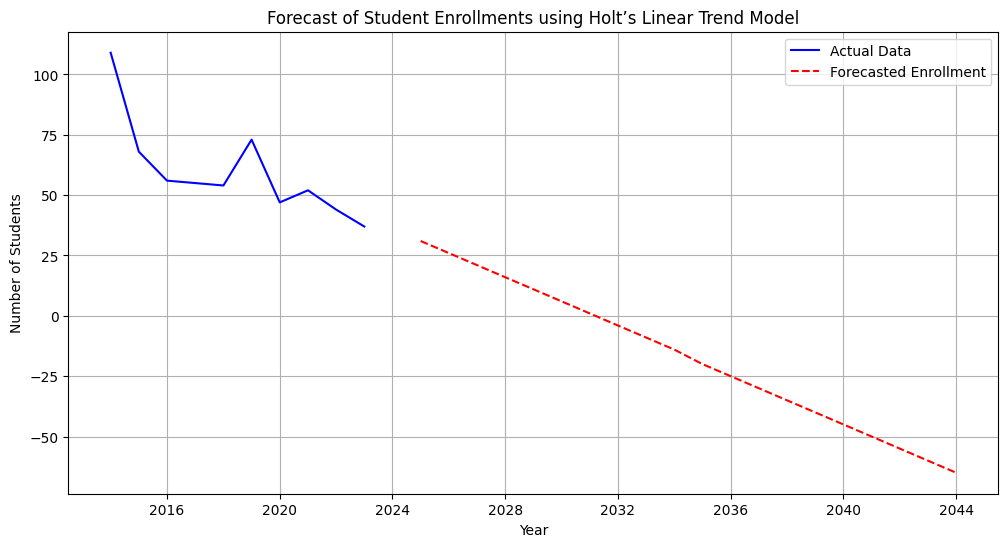

In [141]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=16, header=0)

# Setting correct headers if needed
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.drop(0)  # Drop the first row if it's not part of the data

# Convert 'Year' to a datetime format and set it as index
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)

# Ensure 'Students' column is float for modeling
df['Students'] = pd.to_numeric(df['Students'], errors='coerce')
df = df.dropna(subset=['Students'])

# Define the model
model = ExponentialSmoothing(df['Students'], trend='add', seasonal=None, initialization_method="estimated")
results = model.fit()

# Forecasting the next 20 years
future_years = 20
preds = results.forecast(steps=future_years)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': pd.date_range(start=df.index[-1] + pd.DateOffset(years=1), periods=future_years, freq='A-DEC'),
    'Predicted Students': preds.round().astype(int)
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Students'], color='blue', label='Actual Data')
plt.plot(predicted_enrollment['Year'], predicted_enrollment['Predicted Students'], color='red', linestyle='--', label='Forecasted Enrollment')
plt.title('Forecast of Student Enrollments using Holt’s Linear Trend Model')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\iNetLab\fullenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

C:\Users\iNetLab\AppData\Local\Temp\ipykernel_32028\3516924251.py:28: FutureWarning:

'A' is deprecated and will be removed in a future version, please use 'YE' instead.



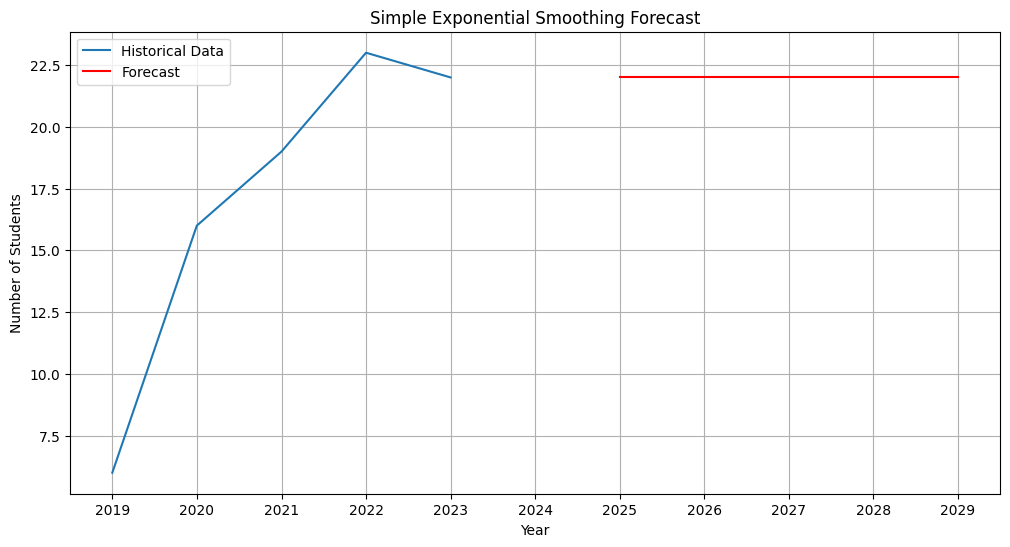

In [142]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing
import matplotlib.pyplot as plt

# Assume df is your DataFrame loaded with Year as the index and Students as the data column

# Load your data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=17, header=0)
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.drop(0)
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)
df['Students'] = pd.to_numeric(df['Students'], errors='coerce')
df.dropna(subset=['Students'], inplace=True)

# Apply Simple Exponential Smoothing
model = SimpleExpSmoothing(df['Students'], initialization_method="estimated")
fitted_model = model.fit(optimized=True)

# Forecast the next 5 years
forecasted_values = fitted_model.forecast(5)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Students'], label='Historical Data')
plt.plot(pd.date_range(start=df.index[-1], periods=6, freq='A')[1:], forecasted_values, label='Forecast', color='red')
plt.title('Simple Exponential Smoothing Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=1, header=0)  # Ensure headers are correctly used


df.head(10)

Bachelor of Science in Computer Science Unnamed: 1          Unnamed: 2  \
0                                    Year   Students  Forecast(Students)   
1                                    2014        100                 NaN   
2                                    2015         44                 NaN   
3                                    2016         65                 NaN   
4                                    2017         59                 NaN   
5                                    2018         94                 NaN   
6                                    2019        105                 NaN   
7                                    2020        135                 NaN   
8                                    2021        184                 NaN   
9                                    2022        246                 NaN   

                         Unnamed: 3                        Unnamed: 4  
0  Lower Confidence Bound(Students)  Upper Confidence Bound(Students)  
1                               NaN                               NaN  
2                               NaN                               NaN  
3                               NaN                               NaN  
4                               NaN                               NaN  
5                               NaN                               NaN  
6                               NaN                               NaN  
7                               NaN                               NaN  
8                               NaN                               NaN  
9                               NaN                               NaN

    Year  Predicted Students
0   2024                1356
1   2025                1391
2   2026                1422
3   2027                1451
4   2028                1476
5   2029                1500
6   2030                1520
7   2031                1538
8   2032                1553
9   2033                1565
10  2034                1574
11  2035                1581
12  2036                1585
13  2037                1586
14  2038                1584
15  2039                1580
16  2040                1573
17  2041                1563
18  2042                1550
19  2043                1535


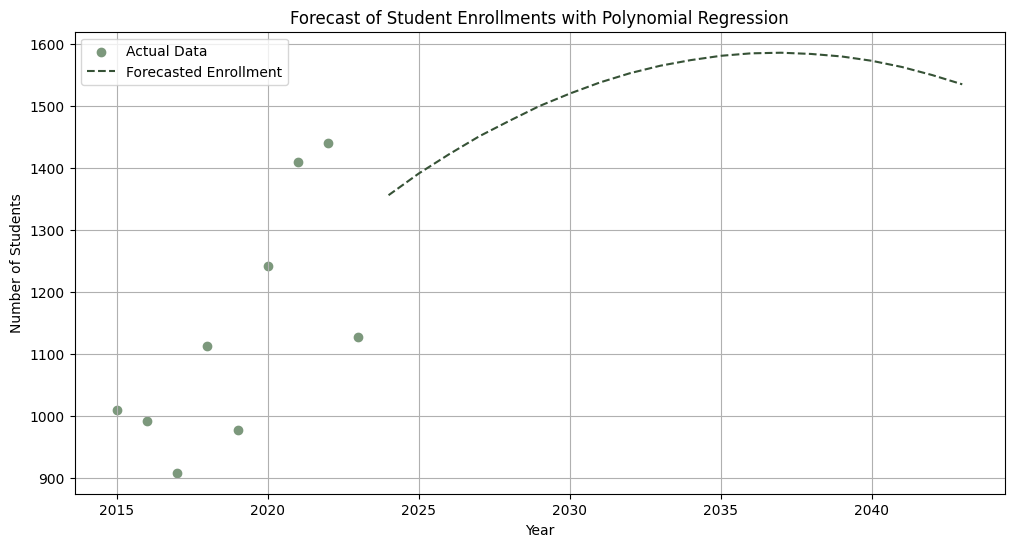

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=18, header=0)  # Correct sheet_name and header index

# Set correct headers if the first row needs adjustment
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.iloc[1:].reset_index(drop=True)  # Drop the first row and reset index if it's a header or unwanted row

# Convert 'Year' to numeric and handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Students'] = pd.to_numeric(df['Students'], errors='coerce')

# Clean data: remove rows where 'Year' or 'Students' might be NaN
df.dropna(subset=['Year', 'Students'], inplace=True)

# Prepare data for Polynomial Regression
X = df[['Year']]
y = df['Students']

# Transform features into polynomial features
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Initialize and fit the Polynomial Regression Model
model = LinearRegression()
model.fit(X_poly, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})
future_years_poly = poly_features.transform(future_years)

# Predict future values
future_preds = model.predict(future_years_poly)

# Ensure predictions are non-negative and round them
future_preds_rounded = np.round(future_preds).clip(min=0).astype(int)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds_rounded
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='#7C987C', label='Actual Data')  # Updated color
plt.plot(future_years['Year'], future_preds_rounded, color='#365236', linestyle='--', label='Forecasted Enrollment')  # Updated color
plt.title('Forecast of Student Enrollments with Polynomial Regression')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()


    Year  Predicted Students
0   2024                2220
1   2025                2299
2   2026                2378
3   2027                2457
4   2028                2536
5   2029                2615
6   2030                2695
7   2031                2774
8   2032                2853
9   2033                2932
10  2034                3011
11  2035                3090
12  2036                3170
13  2037                3249
14  2038                3328
15  2039                3407
16  2040                3486
17  2041                3565
18  2042                3644
19  2043                3724


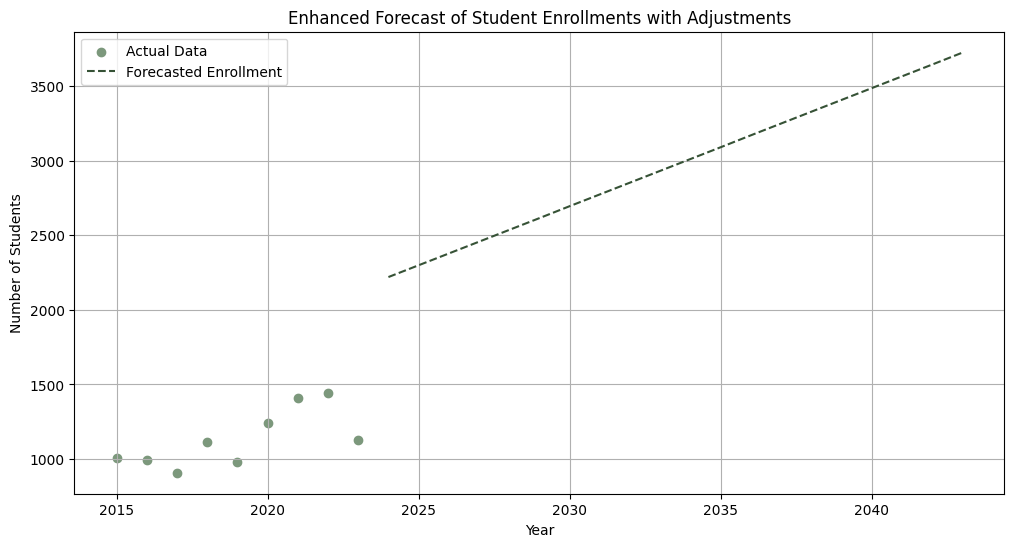

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=18, header=0)  # Adjust if the sheet_name is different

# Assuming the first row is headers, reset headers if necessary
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.iloc[1:].reset_index(drop=True)  # Drop the header row and reset index if included in data

# Convert 'Year' to numeric, handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Students'] = pd.to_numeric(df['Students'], errors='coerce')

# Clean data: remove rows where 'Year' or 'Students' might be NaN
df.dropna(subset=['Year', 'Students'], inplace=True)

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})

# Predict future values
future_preds = model.predict(future_years)

# Apply multiplicative adjustments based on hypothetical demographic factors
# Assuming some arbitrary growth rates for simplicity:
market_growth = 1.08  # 8% growth due to market demands
graduation_rate_increase = 1.10  # 10% increase due to more high school graduates
tech_trends = 1.15  # 15% increase due to technology and online learning trends
location=1.20 #20% increase due to good location
unforeseen_circumstances = 0.98  # 3% decrease due to unforeseen circumstances like COVID-19

# Apply factors yearly
adjustment_factor = market_growth * graduation_rate_increase * tech_trends * unforeseen_circumstances*location
future_preds_adjusted = future_preds * adjustment_factor

# Round and ensure non-negative predictions
future_preds_rounded = np.round(future_preds_adjusted).clip(min=0).astype(int)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds_rounded
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='#7C987C', label='Actual Data')  # Updated color for actual data
plt.plot(future_years['Year'], future_preds_rounded, color='#365236', linestyle='--', label='Forecasted Enrollment')  # Updated color for forecast
plt.title('Enhanced Forecast of Student Enrollments with Adjustments')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()


    Year  Predicted Students
0   2024              1127.0
1   2025              1133.0
2   2026              1146.0
3   2027              1165.0
4   2028              1191.0
5   2029              1225.0
6   2030              1267.0
7   2031              1318.0
8   2032              1379.0
9   2033              1450.0
10  2034              1533.0
11  2035              1630.0
12  2036              1743.0
13  2037              1874.0
14  2038              2025.0
15  2039              2200.0
16  2040              2403.0
17  2041              2639.0
18  2042              2914.0
19  2043              3234.0


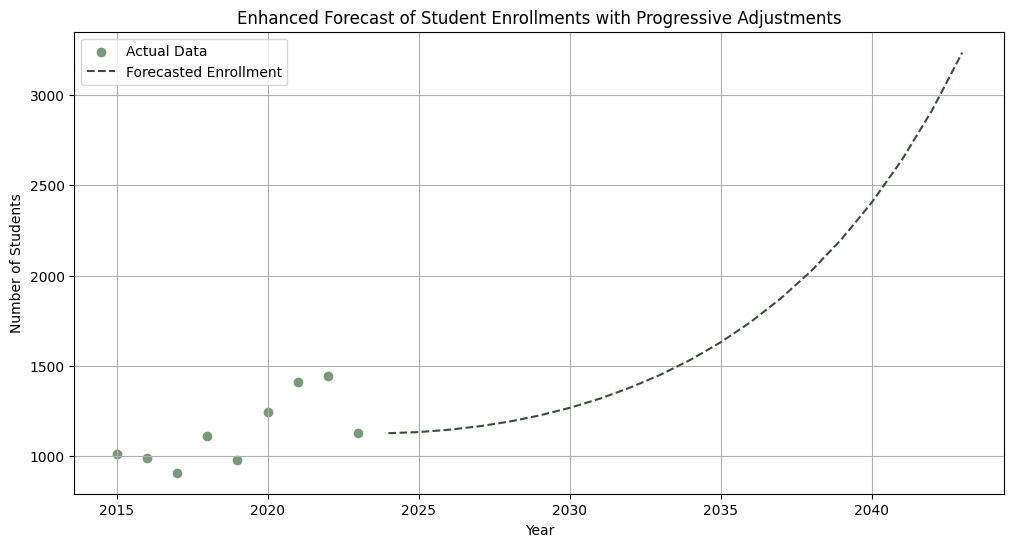

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=18, header=0)  # Assume sheet_name=18 is correct, adjust if needed

# Drop unnecessary header rows if any
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df.drop(index=0, inplace=True)  # Drop the first row if it's a repeated header

# Convert 'Year' to numeric and handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna(subset=['Year', 'Students'])

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Define the time frame
start_year = 2024
end_year = 2043

# Define additional factors and their annual increase rates
market_growth = 0.03  # 3% market demand increase
graduation_rate_increase = 0.05  # 5% increase from high school graduates
tech_trends = 0.08  # 8% technology and online learning trends
unforeseen_circumstances = 0.05  # 5% downward adjustment for unforeseen events

# Initialize the last observed student count to build upon
last_known_students = y.iloc[-1]

# Generate years for forecasting
future_years = np.arange(start_year, end_year + 1)
future_predictions = pd.DataFrame({'Year': future_years})

# Calculate progressive yearly adjustments
predicted_students = [last_known_students]
for i in range(1, len(future_years)):
    previous_students = predicted_students[-1]
    annual_adjustment = 1 + (market_growth + graduation_rate_increase + tech_trends - unforeseen_circumstances) * (i / (end_year - start_year))
    new_student_count = previous_students * annual_adjustment
    predicted_students.append(int(new_student_count))

# Update DataFrame
future_predictions['Predicted Students'] = predicted_students

# Print the predicted enrollments
print(future_predictions)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='#7C987C', label='Actual Data')  # Updated color for actual data
plt.plot(future_predictions['Year'], future_predictions['Predicted Students'], color='#365236', linestyle='--', label='Forecasted Enrollment')  # Updated color for forecast
plt.title('Enhanced Forecast of Student Enrollments with Progressive Adjustments')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()


    Year  Predicted Students
0   2024                 183
1   2025                 184
2   2026                 186
3   2027                 189
4   2028                 193
5   2029                 198
6   2030                 204
7   2031                 212
8   2032                 221
9   2033                 232
10  2034                 245
11  2035                 260
12  2036                 278
13  2037                 298
14  2038                 322
15  2039                 349
16  2040                 381
17  2041                 418
18  2042                 461
19  2043                 511


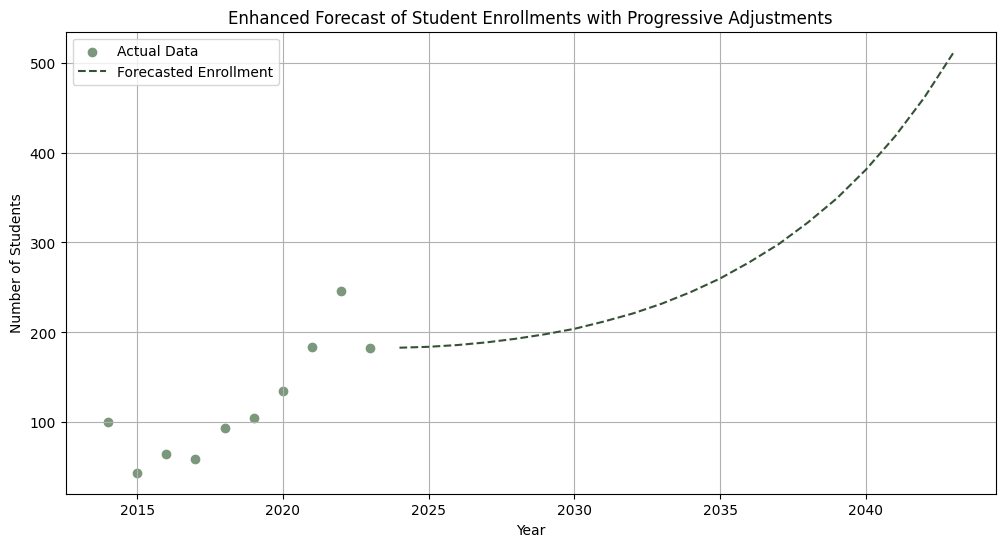

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=1, header=0)  # Assume sheet_name=18 is correct, adjust if needed

# Drop unnecessary header rows if any
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df.drop(index=0, inplace=True)  # Drop the first row if it's a repeated header

# Convert 'Year' to numeric and handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna(subset=['Year', 'Students'])

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Define the time frame
start_year = 2024
end_year = 2043

# Define additional factors and their annual increase rates
market_growth = 0.03  # 3% market demand increase
graduation_rate_increase = 0.05  # 5% increase from high school graduates
tech_trends = 0.08  # 8% technology and online learning trends
unforeseen_circumstances = 0.05  # 5% downward adjustment for unforeseen events

# Initialize the last observed student count to build upon
last_known_students = y.iloc[-1]

# Generate years for forecasting
future_years = np.arange(start_year, end_year + 1)
future_predictions = pd.DataFrame({'Year': future_years})

# Calculate progressive yearly adjustments
predicted_students = [last_known_students]
for i in range(1, len(future_years)):
    previous_students = predicted_students[-1]
    annual_adjustment = 1 + (market_growth + graduation_rate_increase + tech_trends - unforeseen_circumstances) * (i / (end_year - start_year))
    new_student_count = previous_students * annual_adjustment
    predicted_students.append(int(new_student_count))

# Update DataFrame
future_predictions['Predicted Students'] = predicted_students

# Print the predicted enrollments
print(future_predictions)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='#7C987C', label='Actual Data')  # Updated color for actual data
plt.plot(future_predictions['Year'], future_predictions['Predicted Students'], color='#365236', linestyle='--', label='Forecasted Enrollment')  # Updated color for forecast
plt.title('Enhanced Forecast of Student Enrollments with Progressive Adjustments')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()

    Year  Predicted Students
0   2024                 253
1   2025                 262
2   2026                 271
3   2027                 280
4   2028                 289
5   2029                 298
6   2030                 308
7   2031                 317
8   2032                 326
9   2033                 335
10  2034                 344
11  2035                 353
12  2036                 362
13  2037                 371
14  2038                 380
15  2039                 390
16  2040                 399
17  2041                 408
18  2042                 417
19  2043                 426


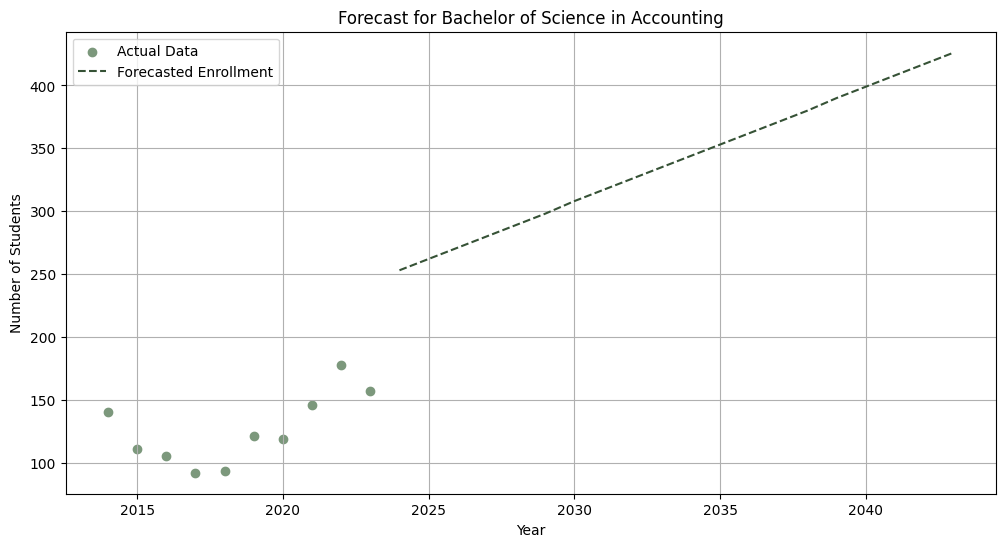

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=0, header=0)  # Adjust if the sheet_name is different

# Assuming the first row is headers, reset headers if necessary
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.iloc[1:].reset_index(drop=True)  # Drop the header row and reset index if included in data

# Convert 'Year' to numeric, handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Students'] = pd.to_numeric(df['Students'], errors='coerce')

# Clean data: remove rows where 'Year' or 'Students' might be NaN
df.dropna(subset=['Year', 'Students'], inplace=True)

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})

# Predict future values
future_preds = model.predict(future_years)

# Apply multiplicative adjustments based on hypothetical demographic factors
# Assuming some arbitrary growth rates for simplicity:
market_growth = 1.08  # 8% growth due to market demands
graduation_rate_increase = 1.10  # 10% increase due to more high school graduates
tech_trends = 1.15  # 15% increase due to technology and online learning trends
location=1.20 #20% increase due to good location
unforeseen_circumstances = 0.98  # 3% decrease due to unforeseen circumstances like COVID-19

# Apply factors yearly
adjustment_factor = market_growth * graduation_rate_increase * tech_trends * unforeseen_circumstances*location
future_preds_adjusted = future_preds * adjustment_factor

# Round and ensure non-negative predictions
future_preds_rounded = np.round(future_preds_adjusted).clip(min=0).astype(int)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds_rounded
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='#7C987C', label='Actual Data')  # Updated color for actual data
plt.plot(future_years['Year'], future_preds_rounded, color='#365236', linestyle='--', label='Forecasted Enrollment')  # Updated color for forecast
plt.title('Forecast for Bachelor of Science in Accounting')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()


    Year  Predicted Students
0   2024                 157
1   2025                 157
2   2026                 158
3   2027                 160
4   2028                 163
5   2029                 167
6   2030                 172
7   2031                 178
8   2032                 186
9   2033                 195
10  2034                 206
11  2035                 219
12  2036                 234
13  2037                 251
14  2038                 271
15  2039                 294
16  2040                 321
17  2041                 352
18  2042                 388
19  2043                 430


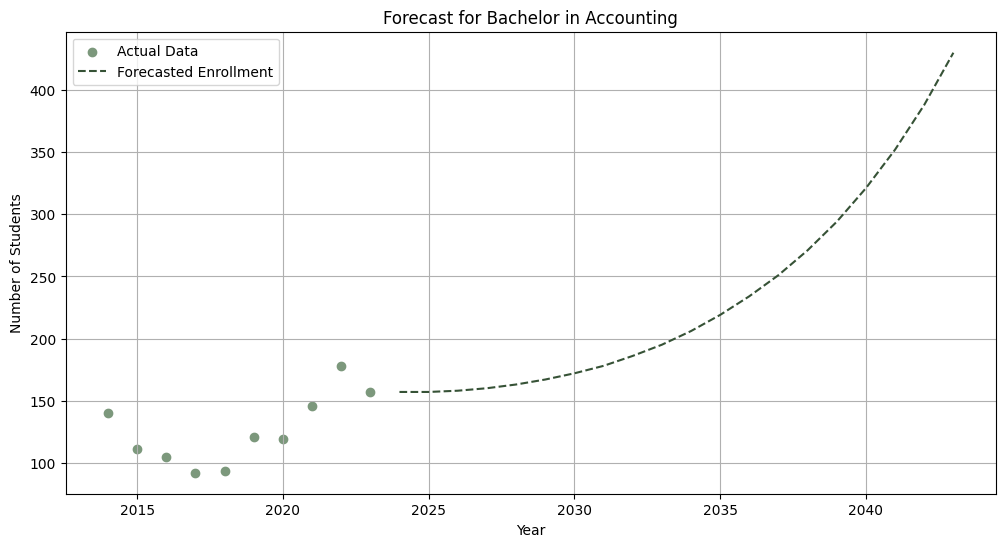

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=0, header=0)  # Assume sheet_name=18 is correct, adjust if needed

# Drop unnecessary header rows if any
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df.drop(index=0, inplace=True)  # Drop the first row if it's a repeated header

# Convert 'Year' to numeric and handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna(subset=['Year', 'Students'])

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Define the time frame
start_year = 2024
end_year = 2043

# Define additional factors and their annual increase rates
market_growth = 0.03  # 3% market demand increase
graduation_rate_increase = 0.05  # 5% increase from high school graduates
tech_trends = 0.08  # 8% technology and online learning trends
unforeseen_circumstances = 0.05  # 5% downward adjustment for unforeseen events

# Initialize the last observed student count to build upon
last_known_students = y.iloc[-1]

# Generate years for forecasting
future_years = np.arange(start_year, end_year + 1)
future_predictions = pd.DataFrame({'Year': future_years})

# Calculate progressive yearly adjustments
predicted_students = [last_known_students]
for i in range(1, len(future_years)):
    previous_students = predicted_students[-1]
    annual_adjustment = 1 + (market_growth + graduation_rate_increase + tech_trends - unforeseen_circumstances) * (i / (end_year - start_year))
    new_student_count = previous_students * annual_adjustment
    predicted_students.append(int(new_student_count))

# Update DataFrame
future_predictions['Predicted Students'] = predicted_students

# Print the predicted enrollments
print(future_predictions)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='#7C987C', label='Actual Data')  # Updated color for actual data
plt.plot(future_predictions['Year'], future_predictions['Predicted Students'], color='#365236', linestyle='--', label='Forecasted Enrollment')  # Updated color for forecast
plt.title('Forecast for Bachelor in Accounting')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()

    Year  Predicted Students
0   2024                 183
1   2025                 184
2   2026                 186
3   2027                 189
4   2028                 193
5   2029                 198
6   2030                 204
7   2031                 212
8   2032                 221
9   2033                 232
10  2034                 245
11  2035                 260
12  2036                 278
13  2037                 298
14  2038                 322
15  2039                 349
16  2040                 381
17  2041                 418
18  2042                 461
19  2043                 511


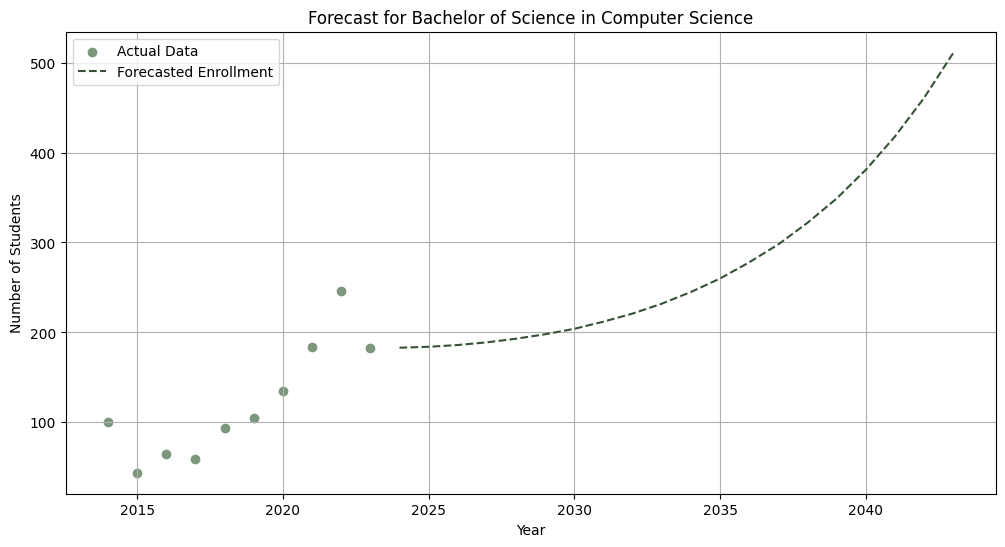

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=1, header=0)  # Assume sheet_name=18 is correct, adjust if needed

# Drop unnecessary header rows if any
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df.drop(index=0, inplace=True)  # Drop the first row if it's a repeated header

# Convert 'Year' to numeric and handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna(subset=['Year', 'Students'])

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Define the time frame
start_year = 2024
end_year = 2043

# Define additional factors and their annual increase rates
market_growth = 0.03  # 3% market demand increase
graduation_rate_increase = 0.05  # 5% increase from high school graduates
tech_trends = 0.08  # 8% technology and online learning trends
unforeseen_circumstances = 0.05  # 5% downward adjustment for unforeseen events

# Initialize the last observed student count to build upon
last_known_students = y.iloc[-1]

# Generate years for forecasting
future_years = np.arange(start_year, end_year + 1)
future_predictions = pd.DataFrame({'Year': future_years})

# Calculate progressive yearly adjustments
predicted_students = [last_known_students]
for i in range(1, len(future_years)):
    previous_students = predicted_students[-1]
    annual_adjustment = 1 + (market_growth + graduation_rate_increase + tech_trends - unforeseen_circumstances) * (i / (end_year - start_year))
    new_student_count = previous_students * annual_adjustment
    predicted_students.append(int(new_student_count))

# Update DataFrame
future_predictions['Predicted Students'] = predicted_students

# Print the predicted enrollments
print(future_predictions)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='#7C987C', label='Actual Data')  # Updated color for actual data
plt.plot(future_predictions['Year'], future_predictions['Predicted Students'], color='#365236', linestyle='--', label='Forecasted Enrollment')  # Updated color for forecast
plt.title('Forecast for Bachelor of Science in Computer Science')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()

    Year  Predicted Students
0   2024                 356
1   2025                 385
2   2026                 414
3   2027                 443
4   2028                 472
5   2029                 501
6   2030                 531
7   2031                 560
8   2032                 589
9   2033                 618
10  2034                 647
11  2035                 676
12  2036                 706
13  2037                 735
14  2038                 764
15  2039                 793
16  2040                 822
17  2041                 851
18  2042                 881
19  2043                 910


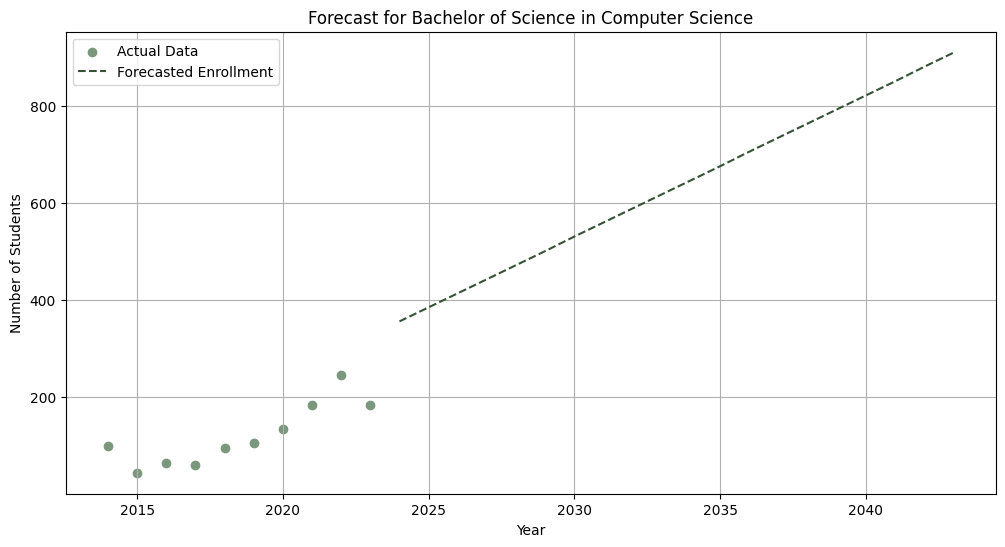

In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=1, header=0)  # Adjust if the sheet_name is different

# Assuming the first row is headers, reset headers if necessary
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.iloc[1:].reset_index(drop=True)  # Drop the header row and reset index if included in data

# Convert 'Year' to numeric, handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Students'] = pd.to_numeric(df['Students'], errors='coerce')

# Clean data: remove rows where 'Year' or 'Students' might be NaN
df.dropna(subset=['Year', 'Students'], inplace=True)

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})

# Predict future values
future_preds = model.predict(future_years)

# Apply multiplicative adjustments based on hypothetical demographic factors
# Assuming some arbitrary growth rates for simplicity:
market_growth = 1.08  # 8% growth due to market demands
graduation_rate_increase = 1.10  # 10% increase due to more high school graduates
tech_trends = 1.15  # 15% increase due to technology and online learning trends
location=1.20 #20% increase due to good location
unforeseen_circumstances = 0.98  # 3% decrease due to unforeseen circumstances like COVID-19

# Apply factors yearly
adjustment_factor = market_growth * graduation_rate_increase * tech_trends * unforeseen_circumstances*location
future_preds_adjusted = future_preds * adjustment_factor

# Round and ensure non-negative predictions
future_preds_rounded = np.round(future_preds_adjusted).clip(min=0).astype(int)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds_rounded
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='#7C987C', label='Actual Data')  # Updated color for actual data
plt.plot(future_years['Year'], future_preds_rounded, color='#365236', linestyle='--', label='Forecasted Enrollment')  # Updated color for forecast
plt.title('Forecast for Bachelor of Science in Computer Science')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()

    Year  Predicted Students
0   2024                 297
1   2025                 315
2   2026                 332
3   2027                 350
4   2028                 367
5   2029                 384
6   2030                 402
7   2031                 419
8   2032                 437
9   2033                 454
10  2034                 471
11  2035                 489
12  2036                 506
13  2037                 524
14  2038                 541
15  2039                 558
16  2040                 576
17  2041                 593
18  2042                 611
19  2043                 628


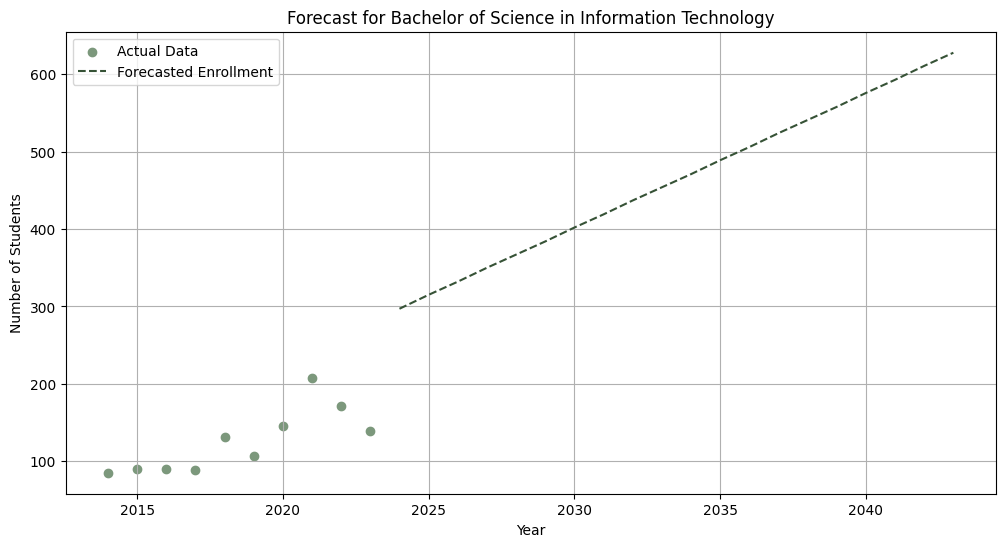

In [23]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=2, header=0)  # Adjust if the sheet_name is different

# Assuming the first row is headers, reset headers if necessary
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.iloc[1:].reset_index(drop=True)  # Drop the header row and reset index if included in data

# Convert 'Year' to numeric, handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Students'] = pd.to_numeric(df['Students'], errors='coerce')

# Clean data: remove rows where 'Year' or 'Students' might be NaN
df.dropna(subset=['Year', 'Students'], inplace=True)

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})

# Predict future values
future_preds = model.predict(future_years)

# Apply multiplicative adjustments based on hypothetical demographic factors
# Assuming some arbitrary growth rates for simplicity:
market_growth = 1.08  # 8% growth due to market demands
graduation_rate_increase = 1.10  # 10% increase due to more high school graduates
tech_trends = 1.15  # 15% increase due to technology and online learning trends
location=1.20 #20% increase due to good location
unforeseen_circumstances = 0.98  # 3% decrease due to unforeseen circumstances like COVID-19

# Apply factors yearly
adjustment_factor = market_growth * graduation_rate_increase * tech_trends * unforeseen_circumstances*location
future_preds_adjusted = future_preds * adjustment_factor

# Round and ensure non-negative predictions
future_preds_rounded = np.round(future_preds_adjusted).clip(min=0).astype(int)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds_rounded
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='#7C987C', label='Actual Data')  # Updated color for actual data
plt.plot(future_years['Year'], future_preds_rounded, color='#365236', linestyle='--', label='Forecasted Enrollment')  # Updated color for forecast
plt.title('Forecast for Bachelor of Science in Information Technology')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()

    Year  Predicted Students
0   2024                  33
1   2025                  36
2   2026                  39
3   2027                  43
4   2028                  46
5   2029                  49
6   2030                  52
7   2031                  55
8   2032                  58
9   2033                  61
10  2034                  64
11  2035                  67
12  2036                  70
13  2037                  73
14  2038                  76
15  2039                  79
16  2040                  83
17  2041                  86
18  2042                  89
19  2043                  92


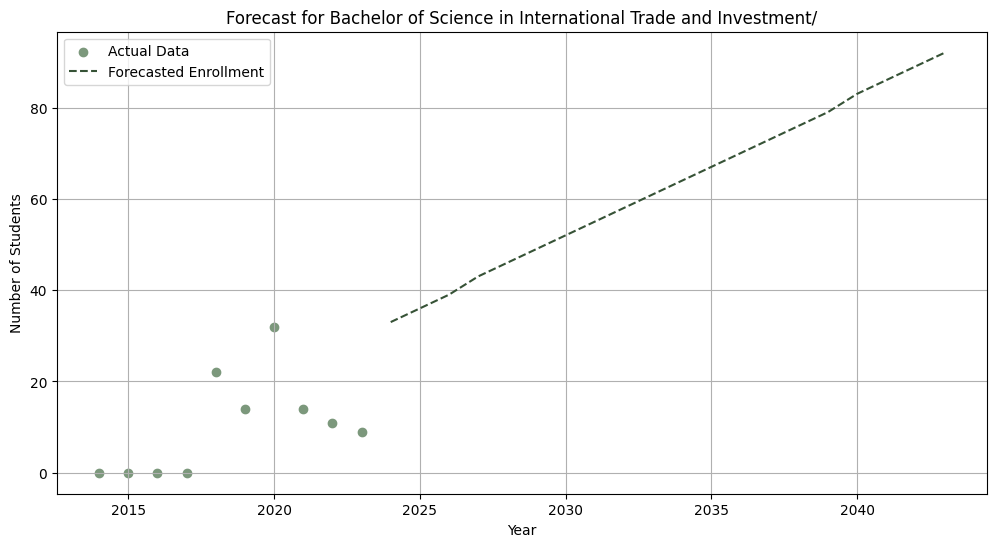

In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=3, header=0)  # Adjust if the sheet_name is different

# Assuming the first row is headers, reset headers if necessary
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.iloc[1:].reset_index(drop=True)  # Drop the header row and reset index if included in data

# Convert 'Year' to numeric, handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Students'] = pd.to_numeric(df['Students'], errors='coerce')

# Clean data: remove rows where 'Year' or 'Students' might be NaN
df.dropna(subset=['Year', 'Students'], inplace=True)

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})

# Predict future values
future_preds = model.predict(future_years)

# Apply multiplicative adjustments based on hypothetical demographic factors
# Assuming some arbitrary growth rates for simplicity:
market_growth = 1.08  # 8% growth due to market demands
graduation_rate_increase = 1.10  # 10% increase due to more high school graduates
tech_trends = 1.15  # 15% increase due to technology and online learning trends
location=1.20 #20% increase due to good location
unforeseen_circumstances = 0.98  # 3% decrease due to unforeseen circumstances like COVID-19

# Apply factors yearly
adjustment_factor = market_growth * graduation_rate_increase * tech_trends * unforeseen_circumstances*location
future_preds_adjusted = future_preds * adjustment_factor

# Round and ensure non-negative predictions
future_preds_rounded = np.round(future_preds_adjusted).clip(min=0).astype(int)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds_rounded
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='#7C987C', label='Actual Data')  # Updated color for actual data
plt.plot(future_years['Year'], future_preds_rounded, color='#365236', linestyle='--', label='Forecasted Enrollment')  # Updated color for forecast
plt.title('Forecast for Bachelor of Science in International Trade and Investment/')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()

    Year  Predicted Students
0   2024                 110
1   2025                 107
2   2026                 104
3   2027                 102
4   2028                  99
5   2029                  96
6   2030                  93
7   2031                  91
8   2032                  88
9   2033                  85
10  2034                  82
11  2035                  80
12  2036                  77
13  2037                  74
14  2038                  71
15  2039                  69
16  2040                  66
17  2041                  63
18  2042                  61
19  2043                  58


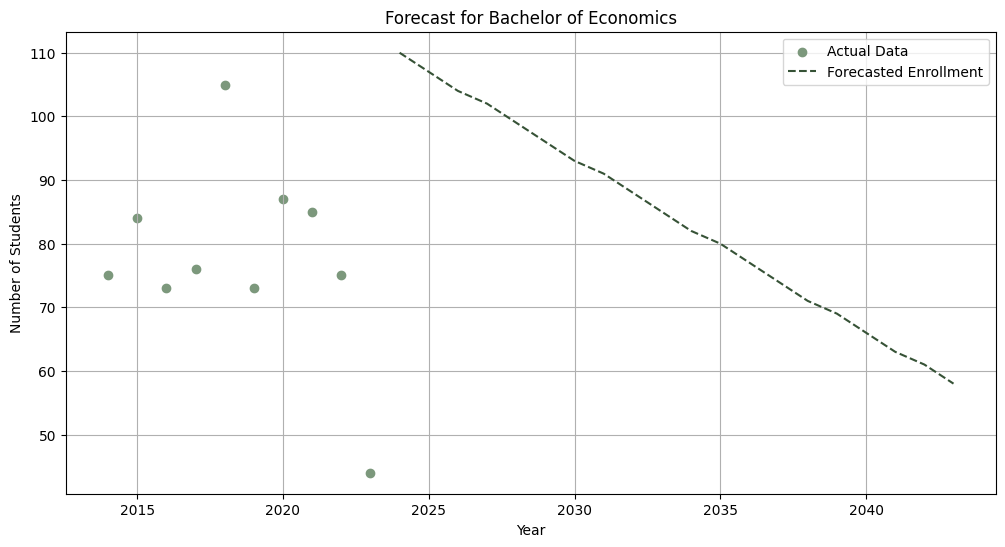

In [26]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=4, header=0)  # Adjust if the sheet_name is different

# Assuming the first row is headers, reset headers if necessary
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.iloc[1:].reset_index(drop=True)  # Drop the header row and reset index if included in data

# Convert 'Year' to numeric, handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Students'] = pd.to_numeric(df['Students'], errors='coerce')

# Clean data: remove rows where 'Year' or 'Students' might be NaN
df.dropna(subset=['Year', 'Students'], inplace=True)

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})

# Predict future values
future_preds = model.predict(future_years)

# Apply multiplicative adjustments based on hypothetical demographic factors
# Assuming some arbitrary growth rates for simplicity:
market_growth = 1.08  # 8% growth due to market demands
graduation_rate_increase = 1.10  # 10% increase due to more high school graduates
tech_trends = 1.15  # 15% increase due to technology and online learning trends
location=1.20 #20% increase due to good location
unforeseen_circumstances = 0.98  # 3% decrease due to unforeseen circumstances like COVID-19

# Apply factors yearly
adjustment_factor = market_growth * graduation_rate_increase * tech_trends * unforeseen_circumstances*location
future_preds_adjusted = future_preds * adjustment_factor

# Round and ensure non-negative predictions
future_preds_rounded = np.round(future_preds_adjusted).clip(min=0).astype(int)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds_rounded
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='#7C987C', label='Actual Data')  # Updated color for actual data
plt.plot(future_years['Year'], future_preds_rounded, color='#365236', linestyle='--', label='Forecasted Enrollment')  # Updated color for forecast
plt.title('Forecast for Bachelor of Economics')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()

    Year  Predicted Students
0   2024                  60
1   2025                  60
2   2026                  61
3   2027                  61
4   2028                  62
5   2029                  62
6   2030                  63
7   2031                  63
8   2032                  64
9   2033                  64
10  2034                  65
11  2035                  65
12  2036                  66
13  2037                  66
14  2038                  67
15  2039                  67
16  2040                  68
17  2041                  68
18  2042                  69
19  2043                  69


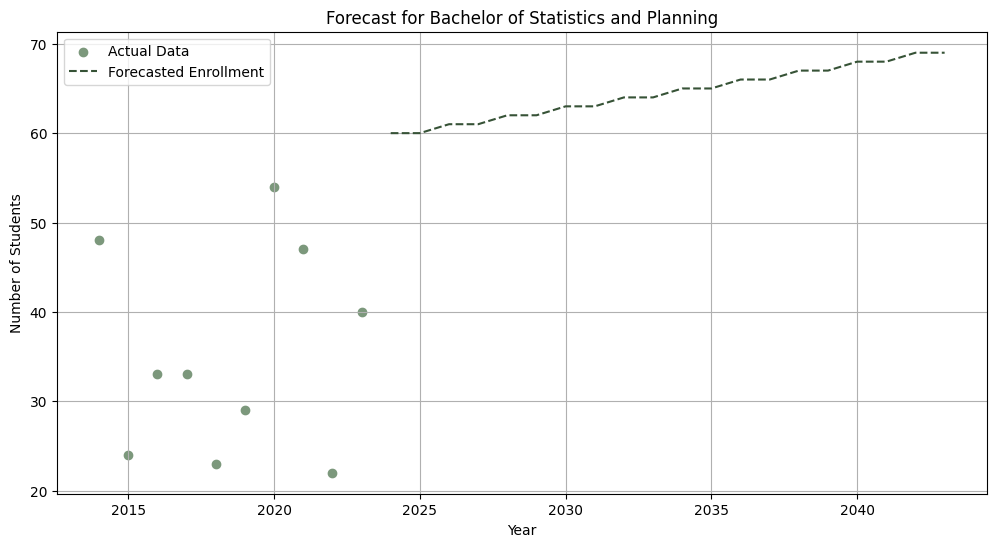

In [28]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=5, header=0)  # Adjust if the sheet_name is different

# Assuming the first row is headers, reset headers if necessary
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.iloc[1:].reset_index(drop=True)  # Drop the header row and reset index if included in data

# Convert 'Year' to numeric, handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Students'] = pd.to_numeric(df['Students'], errors='coerce')

# Clean data: remove rows where 'Year' or 'Students' might be NaN
df.dropna(subset=['Year', 'Students'], inplace=True)

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})

# Predict future values
future_preds = model.predict(future_years)

# Apply multiplicative adjustments based on hypothetical demographic factors
# Assuming some arbitrary growth rates for simplicity:
market_growth = 1.08  # 8% growth due to market demands
graduation_rate_increase = 1.10  # 10% increase due to more high school graduates
tech_trends = 1.15  # 15% increase due to technology and online learning trends
location=1.20 #20% increase due to good location
unforeseen_circumstances = 0.98  # 3% decrease due to unforeseen circumstances like COVID-19

# Apply factors yearly
adjustment_factor = market_growth * graduation_rate_increase * tech_trends * unforeseen_circumstances*location
future_preds_adjusted = future_preds * adjustment_factor

# Round and ensure non-negative predictions
future_preds_rounded = np.round(future_preds_adjusted).clip(min=0).astype(int)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds_rounded
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='#7C987C', label='Actual Data')  # Updated color for actual data
plt.plot(future_years['Year'], future_preds_rounded, color='#365236', linestyle='--', label='Forecasted Enrollment')  # Updated color for forecast
plt.title('Forecast for Bachelor of Statistics and Planning')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()

    Year  Predicted Students
0   2024                   8
1   2025                   8
2   2026                   7
3   2027                   7
4   2028                   6
5   2029                   6
6   2030                   5
7   2031                   5
8   2032                   5
9   2033                   4
10  2034                   4
11  2035                   3
12  2036                   3
13  2037                   2
14  2038                   2
15  2039                   2
16  2040                   1
17  2041                   1
18  2042                   0
19  2043                   0


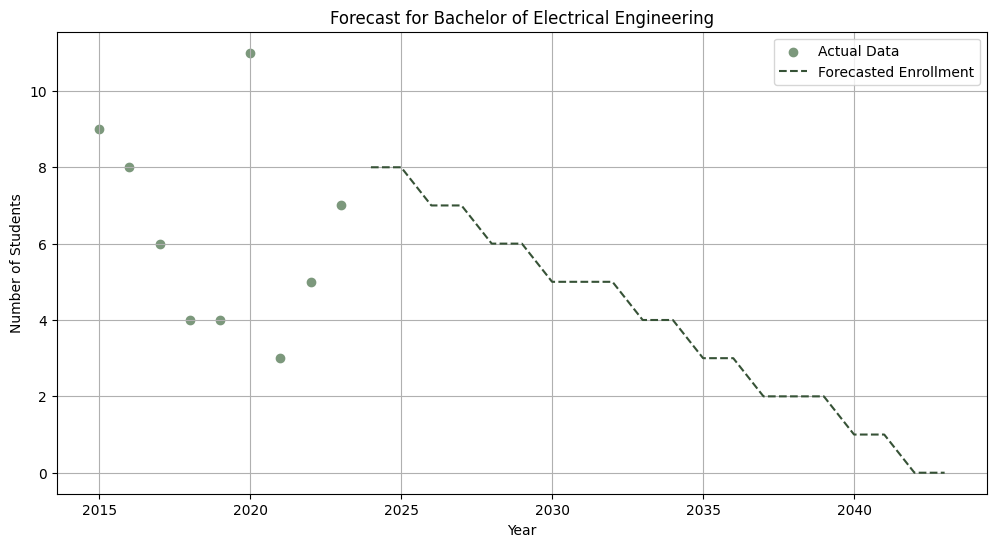

In [29]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=6, header=0)  # Adjust if the sheet_name is different

# Assuming the first row is headers, reset headers if necessary
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.iloc[1:].reset_index(drop=True)  # Drop the header row and reset index if included in data

# Convert 'Year' to numeric, handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Students'] = pd.to_numeric(df['Students'], errors='coerce')

# Clean data: remove rows where 'Year' or 'Students' might be NaN
df.dropna(subset=['Year', 'Students'], inplace=True)

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})

# Predict future values
future_preds = model.predict(future_years)

# Apply multiplicative adjustments based on hypothetical demographic factors
# Assuming some arbitrary growth rates for simplicity:
market_growth = 1.08  # 8% growth due to market demands
graduation_rate_increase = 1.10  # 10% increase due to more high school graduates
tech_trends = 1.15  # 15% increase due to technology and online learning trends
location=1.20 #20% increase due to good location
unforeseen_circumstances = 0.98  # 3% decrease due to unforeseen circumstances like COVID-19

# Apply factors yearly
adjustment_factor = market_growth * graduation_rate_increase * tech_trends * unforeseen_circumstances*location
future_preds_adjusted = future_preds * adjustment_factor

# Round and ensure non-negative predictions
future_preds_rounded = np.round(future_preds_adjusted).clip(min=0).astype(int)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds_rounded
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='#7C987C', label='Actual Data')  # Updated color for actual data
plt.plot(future_years['Year'], future_preds_rounded, color='#365236', linestyle='--', label='Forecasted Enrollment')  # Updated color for forecast
plt.title('Forecast for Bachelor of Electrical Engineering')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()

    Year  Predicted Students
0   2024                  63
1   2025                  62
2   2026                  61
3   2027                  60
4   2028                  59
5   2029                  58
6   2030                  57
7   2031                  56
8   2032                  55
9   2033                  54
10  2034                  53
11  2035                  52
12  2036                  51
13  2037                  50
14  2038                  49
15  2039                  48
16  2040                  47
17  2041                  46
18  2042                  45
19  2043                  44


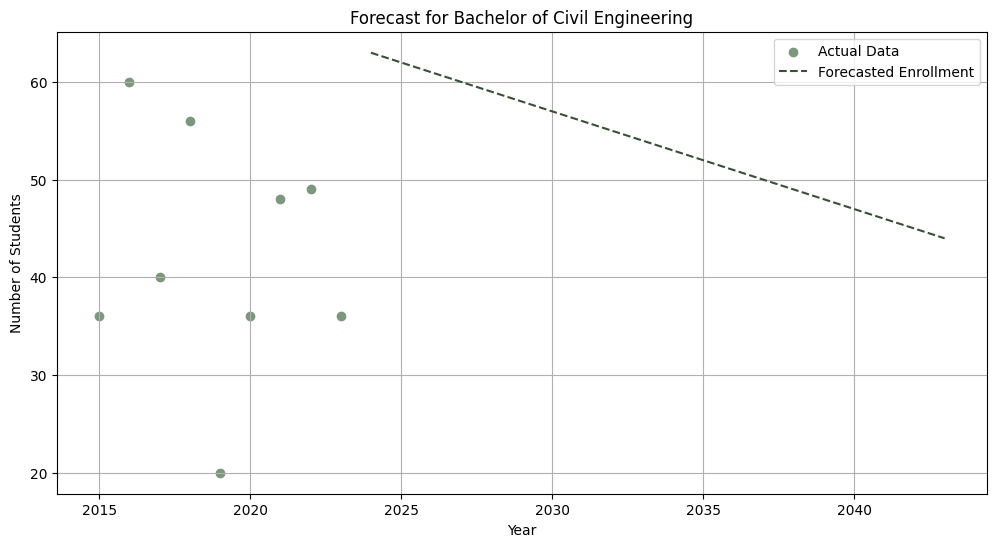

In [30]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=7, header=0)  # Adjust if the sheet_name is different

# Assuming the first row is headers, reset headers if necessary
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.iloc[1:].reset_index(drop=True)  # Drop the header row and reset index if included in data

# Convert 'Year' to numeric, handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Students'] = pd.to_numeric(df['Students'], errors='coerce')

# Clean data: remove rows where 'Year' or 'Students' might be NaN
df.dropna(subset=['Year', 'Students'], inplace=True)

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})

# Predict future values
future_preds = model.predict(future_years)

# Apply multiplicative adjustments based on hypothetical demographic factors
# Assuming some arbitrary growth rates for simplicity:
market_growth = 1.08  # 8% growth due to market demands
graduation_rate_increase = 1.10  # 10% increase due to more high school graduates
tech_trends = 1.15  # 15% increase due to technology and online learning trends
location=1.20 #20% increase due to good location
unforeseen_circumstances = 0.98  # 3% decrease due to unforeseen circumstances like COVID-19

# Apply factors yearly
adjustment_factor = market_growth * graduation_rate_increase * tech_trends * unforeseen_circumstances*location
future_preds_adjusted = future_preds * adjustment_factor

# Round and ensure non-negative predictions
future_preds_rounded = np.round(future_preds_adjusted).clip(min=0).astype(int)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds_rounded
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='#7C987C', label='Actual Data')  # Updated color for actual data
plt.plot(future_years['Year'], future_preds_rounded, color='#365236', linestyle='--', label='Forecasted Enrollment')  # Updated color for forecast
plt.title('Forecast for Bachelor of Civil Engineering')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()

    Year  Predicted Students
0   2024                 136
1   2025                 136
2   2026                 136
3   2027                 136
4   2028                 136
5   2029                 137
6   2030                 137
7   2031                 137
8   2032                 137
9   2033                 137
10  2034                 137
11  2035                 137
12  2036                 137
13  2037                 137
14  2038                 138
15  2039                 138
16  2040                 138
17  2041                 138
18  2042                 138
19  2043                 138


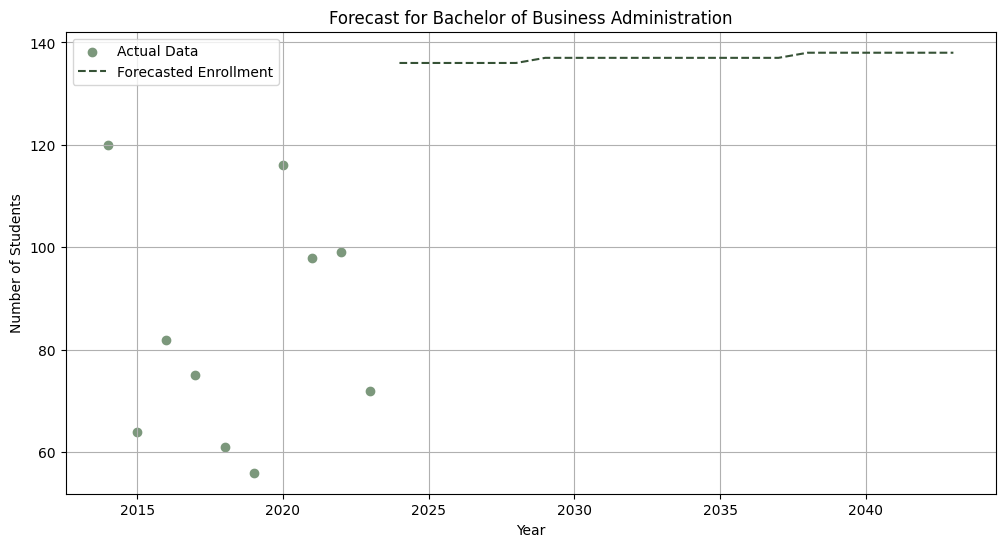

In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=8, header=0)  # Adjust if the sheet_name is different

# Assuming the first row is headers, reset headers if necessary
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.iloc[1:].reset_index(drop=True)  # Drop the header row and reset index if included in data

# Convert 'Year' to numeric, handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Students'] = pd.to_numeric(df['Students'], errors='coerce')

# Clean data: remove rows where 'Year' or 'Students' might be NaN
df.dropna(subset=['Year', 'Students'], inplace=True)

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})

# Predict future values
future_preds = model.predict(future_years)

# Apply multiplicative adjustments based on hypothetical demographic factors
# Assuming some arbitrary growth rates for simplicity:
market_growth = 1.08  # 8% growth due to market demands
graduation_rate_increase = 1.10  # 10% increase due to more high school graduates
tech_trends = 1.15  # 15% increase due to technology and online learning trends
location=1.20 #20% increase due to good location
unforeseen_circumstances = 0.98  # 3% decrease due to unforeseen circumstances like COVID-19

# Apply factors yearly
adjustment_factor = market_growth * graduation_rate_increase * tech_trends * unforeseen_circumstances*location
future_preds_adjusted = future_preds * adjustment_factor

# Round and ensure non-negative predictions
future_preds_rounded = np.round(future_preds_adjusted).clip(min=0).astype(int)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds_rounded
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='#7C987C', label='Actual Data')  # Updated color for actual data
plt.plot(future_years['Year'], future_preds_rounded, color='#365236', linestyle='--', label='Forecasted Enrollment')  # Updated color for forecast
plt.title('Forecast for Bachelor of Business Administration')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()

    Year  Predicted Students
0   2024                 129
1   2025                 111
2   2026                  93
3   2027                  75
4   2028                  58
5   2029                  40
6   2030                  22
7   2031                   4
8   2032                   0
9   2033                   0
10  2034                   0
11  2035                   0
12  2036                   0
13  2037                   0
14  2038                   0
15  2039                   0
16  2040                   0
17  2041                   0
18  2042                   0
19  2043                   0


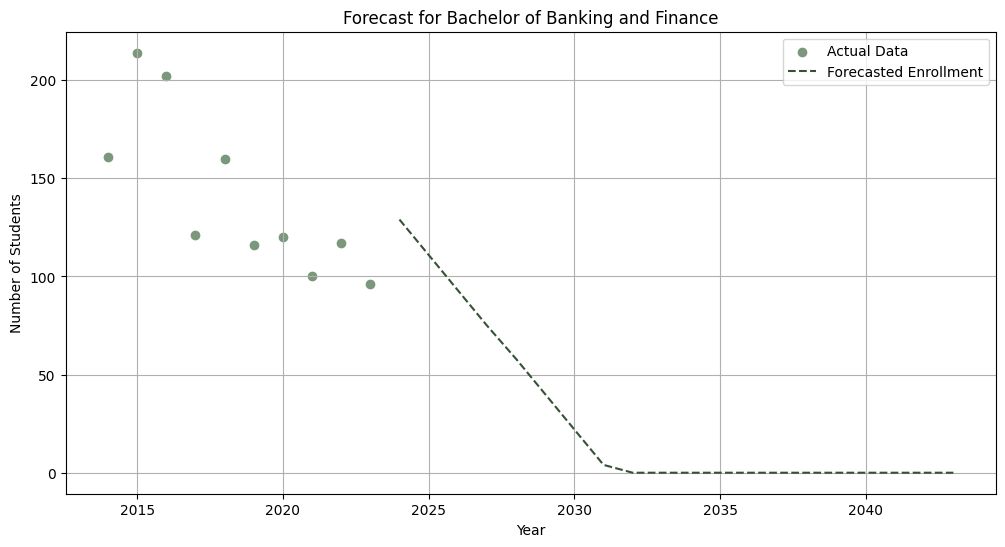

In [32]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=9, header=0)  # Adjust if the sheet_name is different

# Assuming the first row is headers, reset headers if necessary
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.iloc[1:].reset_index(drop=True)  # Drop the header row and reset index if included in data

# Convert 'Year' to numeric, handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Students'] = pd.to_numeric(df['Students'], errors='coerce')

# Clean data: remove rows where 'Year' or 'Students' might be NaN
df.dropna(subset=['Year', 'Students'], inplace=True)

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})

# Predict future values
future_preds = model.predict(future_years)

# Apply multiplicative adjustments based on hypothetical demographic factors
# Assuming some arbitrary growth rates for simplicity:
market_growth = 1.08  # 8% growth due to market demands
graduation_rate_increase = 1.10  # 10% increase due to more high school graduates
tech_trends = 1.15  # 15% increase due to technology and online learning trends
location=1.20 #20% increase due to good location
unforeseen_circumstances = 0.98  # 3% decrease due to unforeseen circumstances like COVID-19

# Apply factors yearly
adjustment_factor = market_growth * graduation_rate_increase * tech_trends * unforeseen_circumstances*location
future_preds_adjusted = future_preds * adjustment_factor

# Round and ensure non-negative predictions
future_preds_rounded = np.round(future_preds_adjusted).clip(min=0).astype(int)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds_rounded
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='#7C987C', label='Actual Data')  # Updated color for actual data
plt.plot(future_years['Year'], future_preds_rounded, color='#365236', linestyle='--', label='Forecasted Enrollment')  # Updated color for forecast
plt.title('Forecast for Bachelor of Banking and Finance')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()

    Year  Predicted Students
0   2024                  83
1   2025                  88
2   2026                  93
3   2027                  98
4   2028                 103
5   2029                 109
6   2030                 114
7   2031                 119
8   2032                 124
9   2033                 129
10  2034                 134
11  2035                 139
12  2036                 145
13  2037                 150
14  2038                 155
15  2039                 160
16  2040                 165
17  2041                 170
18  2042                 175
19  2043                 181


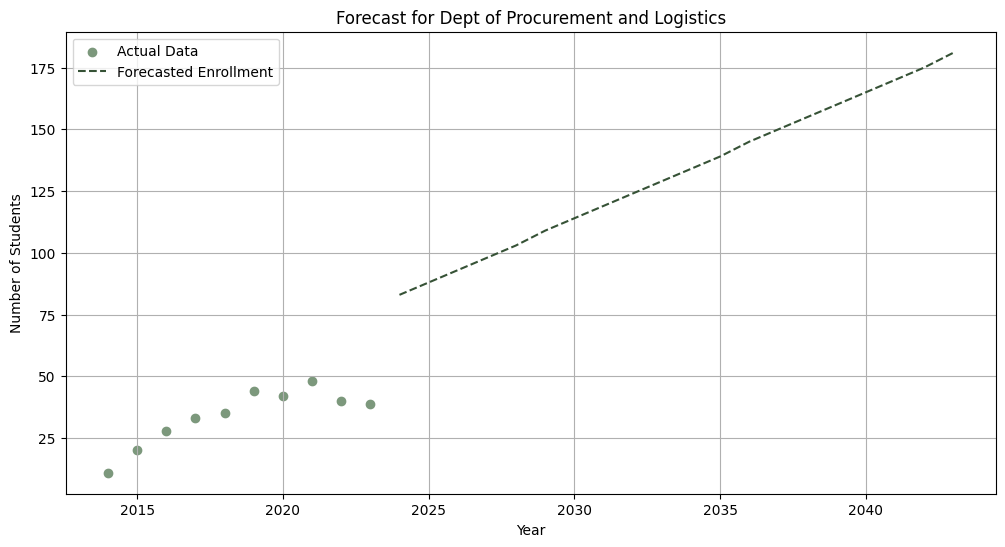

In [33]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=10, header=0)  # Adjust if the sheet_name is different

# Assuming the first row is headers, reset headers if necessary
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.iloc[1:].reset_index(drop=True)  # Drop the header row and reset index if included in data

# Convert 'Year' to numeric, handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Students'] = pd.to_numeric(df['Students'], errors='coerce')

# Clean data: remove rows where 'Year' or 'Students' might be NaN
df.dropna(subset=['Year', 'Students'], inplace=True)

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})

# Predict future values
future_preds = model.predict(future_years)

# Apply multiplicative adjustments based on hypothetical demographic factors
# Assuming some arbitrary growth rates for simplicity:
market_growth = 1.08  # 8% growth due to market demands
graduation_rate_increase = 1.10  # 10% increase due to more high school graduates
tech_trends = 1.15  # 15% increase due to technology and online learning trends
location=1.20 #20% increase due to good location
unforeseen_circumstances = 0.98  # 3% decrease due to unforeseen circumstances like COVID-19

# Apply factors yearly
adjustment_factor = market_growth * graduation_rate_increase * tech_trends * unforeseen_circumstances*location
future_preds_adjusted = future_preds * adjustment_factor

# Round and ensure non-negative predictions
future_preds_rounded = np.round(future_preds_adjusted).clip(min=0).astype(int)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds_rounded
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='#7C987C', label='Actual Data')  # Updated color for actual data
plt.plot(future_years['Year'], future_preds_rounded, color='#365236', linestyle='--', label='Forecasted Enrollment')  # Updated color for forecast
plt.title('Forecast for Dept of Procurement and Logistics')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()

    Year  Predicted Students
0   2024                 101
1   2025                 102
2   2026                 102
3   2027                 102
4   2028                 103
5   2029                 103
6   2030                 103
7   2031                 103
8   2032                 104
9   2033                 104
10  2034                 104
11  2035                 104
12  2036                 105
13  2037                 105
14  2038                 105
15  2039                 106
16  2040                 106
17  2041                 106
18  2042                 106
19  2043                 107


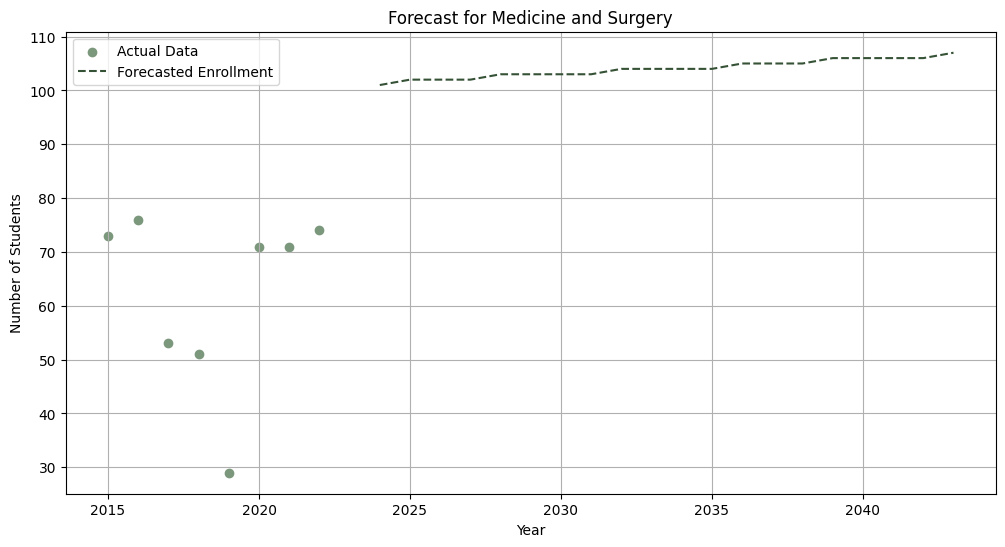

In [39]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=11, header=0)  # Adjust if the sheet_name is different

# Assuming the first row is headers, reset headers if necessary
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.iloc[1:].reset_index(drop=True)  # Drop the header row and reset index if included in data

# Convert 'Year' and 'Students' to numeric, handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Students'] = pd.to_numeric(df['Students'], errors='coerce')

# Clean data: remove rows where 'Year' or 'Students' might be NaN
df.dropna(subset=['Year', 'Students'], inplace=True)

# Filter to include only data from 2015 to 2022
df = df[(df['Year'] >= 2015) & (df['Year'] <= 2022)]

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})

# Predict future values
future_preds = model.predict(future_years)

# Apply multiplicative adjustments based on hypothetical demographic factors
market_growth = 1.08  # 8% growth due to market demands
graduation_rate_increase = 1.10  # 10% increase due to more high school graduates
tech_trends = 1.15  # 15% increase due to technology and online learning trends
location = 1.20  # 20% increase due to good location
unforeseen_circumstances = 0.98  # 2% decrease due to unforeseen circumstances like COVID-19

# Apply factors yearly
adjustment_factor = market_growth * graduation_rate_increase * tech_trends * location * unforeseen_circumstances
future_preds_adjusted = future_preds * adjustment_factor

# Round and ensure non-negative predictions
future_preds_rounded = np.round(future_preds_adjusted).clip(min=0).astype(int)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds_rounded
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='#7C987C', label='Actual Data')  # Updated color for actual data
plt.plot(future_years['Year'], future_preds_rounded, color='#365236', linestyle='--', label='Forecasted Enrollment')  # Updated color for forecast
plt.title('Forecast for Medicine and Surgery')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()



    Year  Predicted Students
0   2024                  62
1   2025                  65
2   2026                  68
3   2027                  71
4   2028                  74
5   2029                  77
6   2030                  80
7   2031                  83
8   2032                  87
9   2033                  90
10  2034                  93
11  2035                  96
12  2036                  99
13  2037                 102
14  2038                 105
15  2039                 108
16  2040                 111
17  2041                 114
18  2042                 118
19  2043                 121


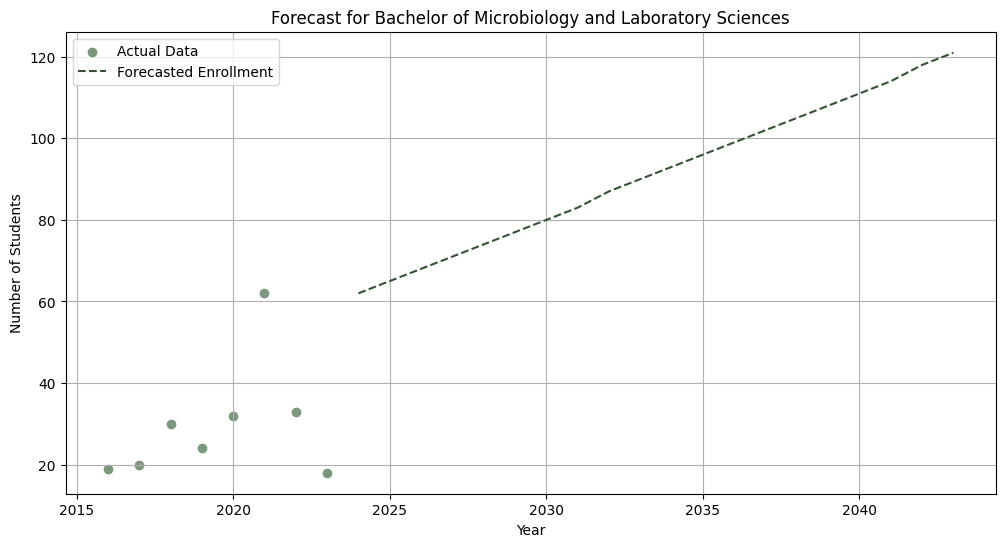

In [40]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=12, header=0)  # Adjust if the sheet_name is different

# Assuming the first row is headers, reset headers if necessary
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.iloc[1:].reset_index(drop=True)  # Drop the header row and reset index if included in data

# Convert 'Year' to numeric, handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Students'] = pd.to_numeric(df['Students'], errors='coerce')

# Clean data: remove rows where 'Year' or 'Students' might be NaN
df.dropna(subset=['Year', 'Students'], inplace=True)

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})

# Predict future values
future_preds = model.predict(future_years)

# Apply multiplicative adjustments based on hypothetical demographic factors
# Assuming some arbitrary growth rates for simplicity:
market_growth = 1.08  # 8% growth due to market demands
graduation_rate_increase = 1.10  # 10% increase due to more high school graduates
tech_trends = 1.15  # 15% increase due to technology and online learning trends
location=1.20 #20% increase due to good location
unforeseen_circumstances = 0.98  # 3% decrease due to unforeseen circumstances like COVID-19

# Apply factors yearly
adjustment_factor = market_growth * graduation_rate_increase * tech_trends * unforeseen_circumstances*location
future_preds_adjusted = future_preds * adjustment_factor

# Round and ensure non-negative predictions
future_preds_rounded = np.round(future_preds_adjusted).clip(min=0).astype(int)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds_rounded
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='#7C987C', label='Actual Data')  # Updated color for actual data
plt.plot(future_years['Year'], future_preds_rounded, color='#365236', linestyle='--', label='Forecasted Enrollment')  # Updated color for forecast
plt.title('Forecast for Bachelor of Microbiology and Laboratory Sciences')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()

    Year  Predicted Students
0   2024                  58
1   2025                  63
2   2026                  69
3   2027                  74
4   2028                  79
5   2029                  84
6   2030                  89
7   2031                  95
8   2032                 100
9   2033                 105
10  2034                 110
11  2035                 115
12  2036                 120
13  2037                 126
14  2038                 131
15  2039                 136
16  2040                 141
17  2041                 146
18  2042                 151
19  2043                 157


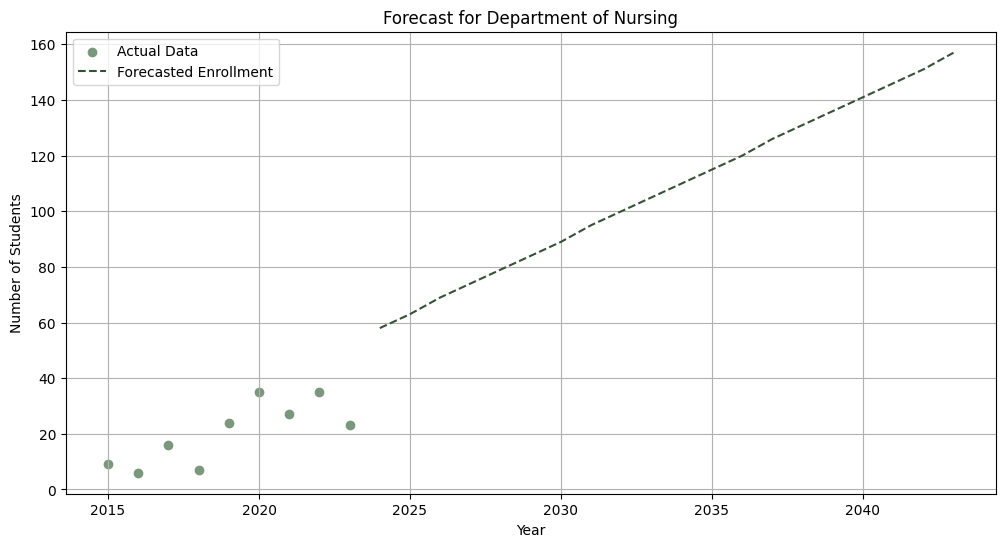

In [42]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=13, header=0)  # Adjust if the sheet_name is different

# Assuming the first row is headers, reset headers if necessary
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.iloc[1:].reset_index(drop=True)  # Drop the header row and reset index if included in data

# Convert 'Year' to numeric, handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Students'] = pd.to_numeric(df['Students'], errors='coerce')

# Clean data: remove rows where 'Year' or 'Students' might be NaN
df.dropna(subset=['Year', 'Students'], inplace=True)

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})

# Predict future values
future_preds = model.predict(future_years)

# Apply multiplicative adjustments based on hypothetical demographic factors
# Assuming some arbitrary growth rates for simplicity:
market_growth = 1.08  # 8% growth due to market demands
graduation_rate_increase = 1.10  # 10% increase due to more high school graduates
tech_trends = 1.15  # 15% increase due to technology and online learning trends
location=1.20 #20% increase due to good location
unforeseen_circumstances = 0.98  # 3% decrease due to unforeseen circumstances like COVID-19

# Apply factors yearly
adjustment_factor = market_growth * graduation_rate_increase * tech_trends * unforeseen_circumstances*location
future_preds_adjusted = future_preds * adjustment_factor

# Round and ensure non-negative predictions
future_preds_rounded = np.round(future_preds_adjusted).clip(min=0).astype(int)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds_rounded
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='#7C987C', label='Actual Data')  # Updated color for actual data
plt.plot(future_years['Year'], future_preds_rounded, color='#365236', linestyle='--', label='Forecasted Enrollment')  # Updated color for forecast
plt.title('Forecast for Department of Nursing')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()

    Year  Predicted Students
0   2024                  43
1   2025                  45
2   2026                  46
3   2027                  48
4   2028                  50
5   2029                  52
6   2030                  54
7   2031                  56
8   2032                  58
9   2033                  60
10  2034                  62
11  2035                  64
12  2036                  65
13  2037                  67
14  2038                  69
15  2039                  71
16  2040                  73
17  2041                  75
18  2042                  77
19  2043                  79


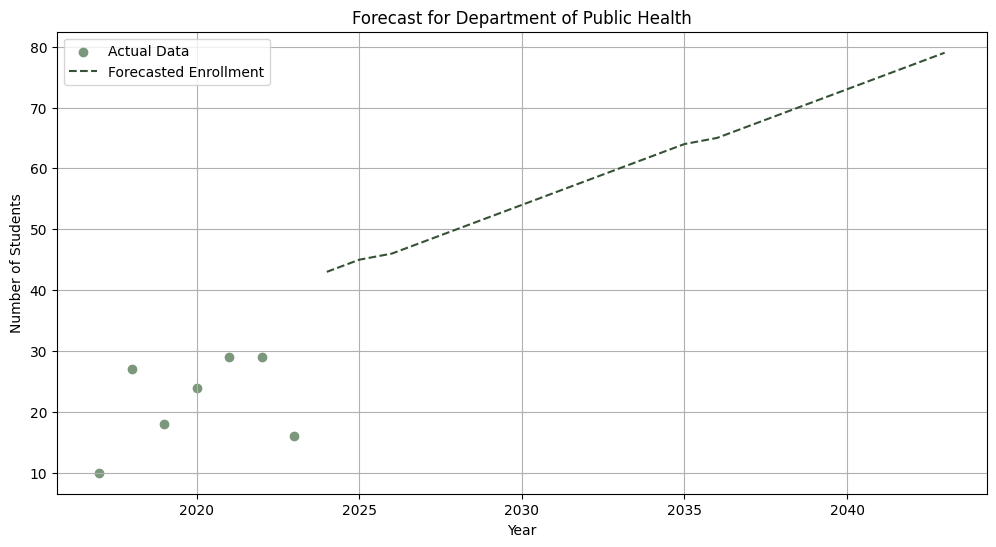

In [43]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=14, header=0)  # Adjust if the sheet_name is different

# Assuming the first row is headers, reset headers if necessary
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.iloc[1:].reset_index(drop=True)  # Drop the header row and reset index if included in data

# Convert 'Year' to numeric, handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Students'] = pd.to_numeric(df['Students'], errors='coerce')

# Clean data: remove rows where 'Year' or 'Students' might be NaN
df.dropna(subset=['Year', 'Students'], inplace=True)

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})

# Predict future values
future_preds = model.predict(future_years)

# Apply multiplicative adjustments based on hypothetical demographic factors
# Assuming some arbitrary growth rates for simplicity:
market_growth = 1.08  # 8% growth due to market demands
graduation_rate_increase = 1.10  # 10% increase due to more high school graduates
tech_trends = 1.15  # 15% increase due to technology and online learning trends
location=1.20 #20% increase due to good location
unforeseen_circumstances = 0.98  # 3% decrease due to unforeseen circumstances like COVID-19

# Apply factors yearly
adjustment_factor = market_growth * graduation_rate_increase * tech_trends * unforeseen_circumstances*location
future_preds_adjusted = future_preds * adjustment_factor

# Round and ensure non-negative predictions
future_preds_rounded = np.round(future_preds_adjusted).clip(min=0).astype(int)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds_rounded
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='#7C987C', label='Actual Data')  # Updated color for actual data
plt.plot(future_years['Year'], future_preds_rounded, color='#365236', linestyle='--', label='Forecasted Enrollment')  # Updated color for forecast
plt.title('Forecast for Department of Public Health')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()

    Year  Predicted Students
0   2024                  69
1   2025                  73
2   2026                  77
3   2027                  82
4   2028                  86
5   2029                  90
6   2030                  94
7   2031                  99
8   2032                 103
9   2033                 107
10  2034                 111
11  2035                 116
12  2036                 120
13  2037                 124
14  2038                 128
15  2039                 133
16  2040                 137
17  2041                 141
18  2042                 145
19  2043                 150


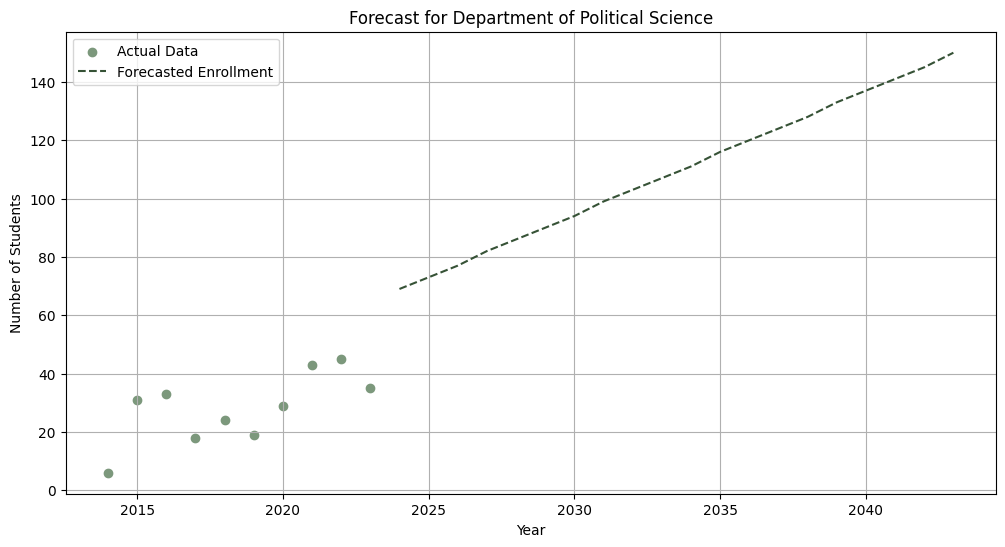

In [44]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=15, header=0)  # Adjust if the sheet_name is different

# Assuming the first row is headers, reset headers if necessary
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.iloc[1:].reset_index(drop=True)  # Drop the header row and reset index if included in data

# Convert 'Year' to numeric, handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Students'] = pd.to_numeric(df['Students'], errors='coerce')

# Clean data: remove rows where 'Year' or 'Students' might be NaN
df.dropna(subset=['Year', 'Students'], inplace=True)

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})

# Predict future values
future_preds = model.predict(future_years)

# Apply multiplicative adjustments based on hypothetical demographic factors
# Assuming some arbitrary growth rates for simplicity:
market_growth = 1.08  # 8% growth due to market demands
graduation_rate_increase = 1.10  # 10% increase due to more high school graduates
tech_trends = 1.15  # 15% increase due to technology and online learning trends
location=1.20 #20% increase due to good location
unforeseen_circumstances = 0.98  # 3% decrease due to unforeseen circumstances like COVID-19

# Apply factors yearly
adjustment_factor = market_growth * graduation_rate_increase * tech_trends * unforeseen_circumstances*location
future_preds_adjusted = future_preds * adjustment_factor

# Round and ensure non-negative predictions
future_preds_rounded = np.round(future_preds_adjusted).clip(min=0).astype(int)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds_rounded
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='#7C987C', label='Actual Data')  # Updated color for actual data
plt.plot(future_years['Year'], future_preds_rounded, color='#365236', linestyle='--', label='Forecasted Enrollment')  # Updated color for forecast
plt.title('Forecast for Department of Political Science')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()

    Year  Predicted Students
0   2024                  51
1   2025                  42
2   2026                  34
3   2027                  26
4   2028                  18
5   2029                  10
6   2030                   1
7   2031                   0
8   2032                   0
9   2033                   0
10  2034                   0
11  2035                   0
12  2036                   0
13  2037                   0
14  2038                   0
15  2039                   0
16  2040                   0
17  2041                   0
18  2042                   0
19  2043                   0


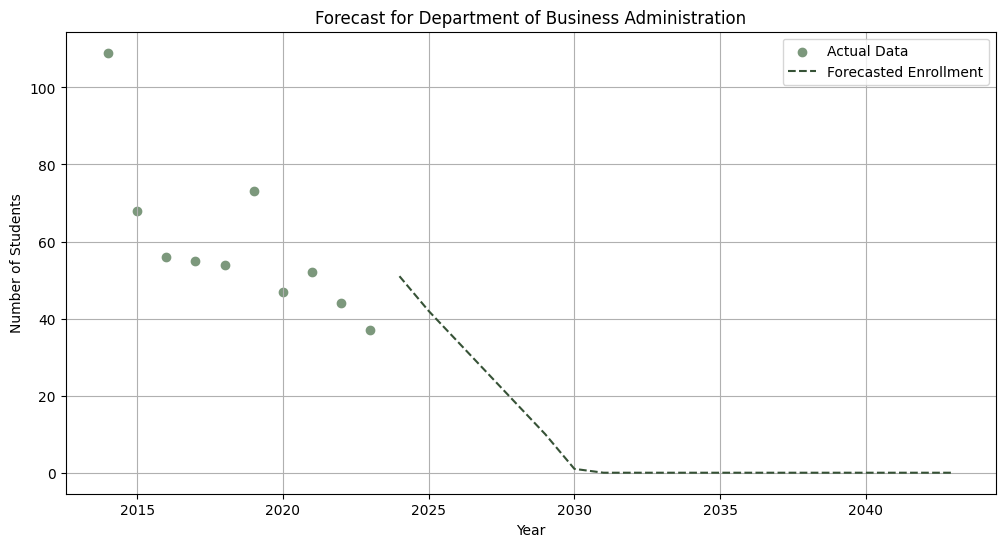

In [45]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=16, header=0)  # Adjust if the sheet_name is different

# Assuming the first row is headers, reset headers if necessary
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.iloc[1:].reset_index(drop=True)  # Drop the header row and reset index if included in data

# Convert 'Year' to numeric, handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Students'] = pd.to_numeric(df['Students'], errors='coerce')

# Clean data: remove rows where 'Year' or 'Students' might be NaN
df.dropna(subset=['Year', 'Students'], inplace=True)

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})

# Predict future values
future_preds = model.predict(future_years)

# Apply multiplicative adjustments based on hypothetical demographic factors
# Assuming some arbitrary growth rates for simplicity:
market_growth = 1.08  # 8% growth due to market demands
graduation_rate_increase = 1.10  # 10% increase due to more high school graduates
tech_trends = 1.15  # 15% increase due to technology and online learning trends
location=1.20 #20% increase due to good location
unforeseen_circumstances = 0.98  # 3% decrease due to unforeseen circumstances like COVID-19

# Apply factors yearly
adjustment_factor = market_growth * graduation_rate_increase * tech_trends * unforeseen_circumstances*location
future_preds_adjusted = future_preds * adjustment_factor

# Round and ensure non-negative predictions
future_preds_rounded = np.round(future_preds_adjusted).clip(min=0).astype(int)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds_rounded
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='#7C987C', label='Actual Data')  # Updated color for actual data
plt.plot(future_years['Year'], future_preds_rounded, color='#365236', linestyle='--', label='Forecasted Enrollment')  # Updated color for forecast
plt.title('Forecast for Department of Business Administration')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()

    Year  Predicted Students
0   2024                  46
1   2025                  53
2   2026                  59
3   2027                  65
4   2028                  71
5   2029                  78
6   2030                  84
7   2031                  90
8   2032                  97
9   2033                 103
10  2034                 109
11  2035                 115
12  2036                 122
13  2037                 128
14  2038                 134
15  2039                 140
16  2040                 147
17  2041                 153
18  2042                 159
19  2043                 165


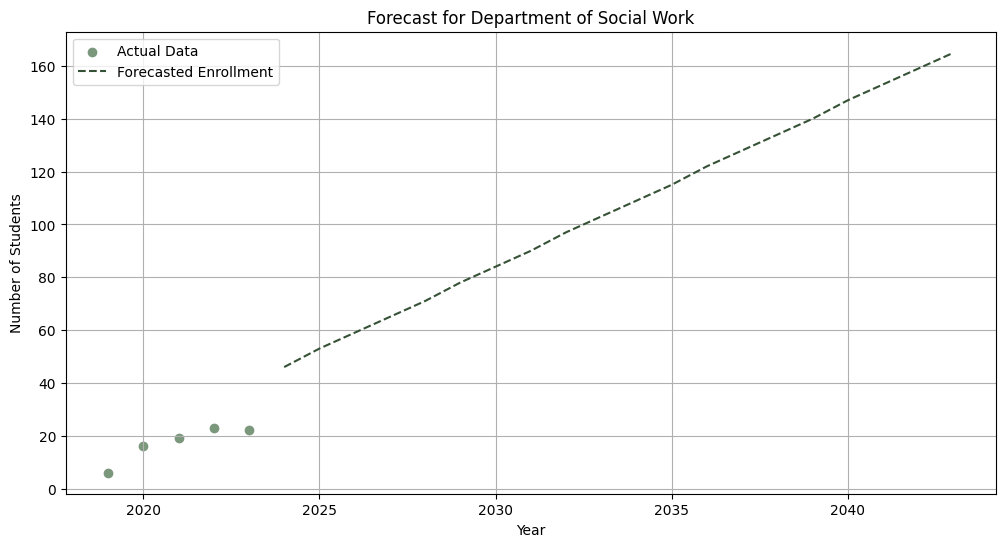

In [46]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=17, header=0)  # Adjust if the sheet_name is different

# Assuming the first row is headers, reset headers if necessary
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.iloc[1:].reset_index(drop=True)  # Drop the header row and reset index if included in data

# Convert 'Year' to numeric, handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Students'] = pd.to_numeric(df['Students'], errors='coerce')

# Clean data: remove rows where 'Year' or 'Students' might be NaN
df.dropna(subset=['Year', 'Students'], inplace=True)

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})

# Predict future values
future_preds = model.predict(future_years)

# Apply multiplicative adjustments based on hypothetical demographic factors
# Assuming some arbitrary growth rates for simplicity:
market_growth = 1.08  # 8% growth due to market demands
graduation_rate_increase = 1.10  # 10% increase due to more high school graduates
tech_trends = 1.15  # 15% increase due to technology and online learning trends
location=1.20 #20% increase due to good location
unforeseen_circumstances = 0.98  # 3% decrease due to unforeseen circumstances like COVID-19

# Apply factors yearly
adjustment_factor = market_growth * graduation_rate_increase * tech_trends * unforeseen_circumstances*location
future_preds_adjusted = future_preds * adjustment_factor

# Round and ensure non-negative predictions
future_preds_rounded = np.round(future_preds_adjusted).clip(min=0).astype(int)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds_rounded
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='#7C987C', label='Actual Data')  # Updated color for actual data
plt.plot(future_years['Year'], future_preds_rounded, color='#365236', linestyle='--', label='Forecasted Enrollment')  # Updated color for forecast
plt.title('Forecast for Department of Social Work')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()

    Year  Predicted Students
0   2024                2582
1   2025                2674
2   2026                2766
3   2027                2858
4   2028                2950
5   2029                3042
6   2030                3135
7   2031                3227
8   2032                3319
9   2033                3411
10  2034                3503
11  2035                3595
12  2036                3687
13  2037                3779
14  2038                3871
15  2039                3963
16  2040                4055
17  2041                4147
18  2042                4239
19  2043                4332


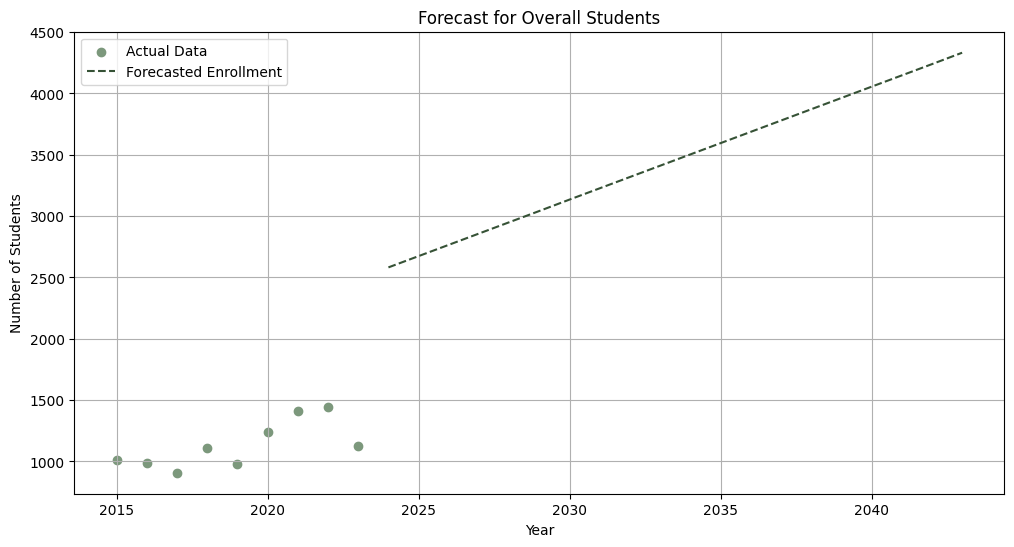

In [50]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'Forecasting last.xlsx'
df = pd.read_excel(file_path, sheet_name=18, header=0)  # Adjust if the sheet_name is different

# Assuming the first row is headers, reset headers if necessary
df.columns = ['Year', 'Students', 'Forecast', 'Lower Confidence Bound', 'Upper Confidence Limit']
df = df.iloc[1:].reset_index(drop=True)  # Drop the header row and reset index if included in data

# Convert 'Year' to numeric, handle NaN values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Students'] = pd.to_numeric(df['Students'], errors='coerce')

# Clean data: remove rows where 'Year' or 'Students' might be NaN
df.dropna(subset=['Year', 'Students'], inplace=True)

# Prepare data for Linear Regression
X = df[['Year']]
y = df['Students']

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Generate years for forecasting
future_years = pd.DataFrame({'Year': np.arange(2024, 2044)})

# Predict future values
future_preds = model.predict(future_years)

# Apply multiplicative adjustments based on hypothetical demographic factors
# Assuming some arbitrary growth rates for simplicity:
market_growth = 1.08  # 8% growth due to market demands
graduation_rate_increase = 1.10  # 10% increase due to more high school graduates
tech_trends = 1.15  # 15% increase due to technology and online learning trends
location=1.20 #20% increase due to good location
unforeseen_circumstances = 0.95  # 5% decrease due to unforeseen circumstances like COVID-19
new_policy=1.20

# Apply factors yearly
adjustment_factor = market_growth * graduation_rate_increase * tech_trends * unforeseen_circumstances*location*new_policy
future_preds_adjusted = future_preds * adjustment_factor

# Round and ensure non-negative predictions
future_preds_rounded = np.round(future_preds_adjusted).clip(min=0).astype(int)

# Create a DataFrame for the predicted results
predicted_enrollment = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Students': future_preds_rounded
})

# Print the predicted enrollments
print(predicted_enrollment)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Students'], color='#7C987C', label='Actual Data')  # Updated color for actual data
plt.plot(future_years['Year'], future_preds_rounded, color='#365236', linestyle='--', label='Forecasted Enrollment')  # Updated color for forecast
plt.title('Forecast for Overall Students')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.show()